In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [403]:
data=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns', 500)
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [404]:
data.shape

(1000, 40)

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Description:

Data Having 1000 entries, 0 to 999

Data is ahving 1000 Rows and 40 Columns.

All the columns are having 1000 Non-Null value, only _c39 is having all the data as Null.

Data having 2 float , 17 integer and 21 object columns.

In some columns we have "?", which is need to be treated further.

memory usage: 312.6+ KB


# Checking Null Values

In [406]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [407]:
# Droping _c39 column 
data.drop('_c39', axis= 1, inplace= True )

In [408]:
# Checkign Duplicated values. 
data.duplicated().sum() 

0

In [409]:
#Checkign any sapce values present in the columns 
data.isin([" "]).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [410]:
#Checkign any '? ' values present in the columns 
data.isin(["?"]).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [411]:
#Replacing data with Nan 
data.replace(to_replace="?", value=np.nan, inplace= True)
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Now data is having Nan as we replaced "?" with Nan,
We will not drop these columns, we will fill the values

Missing values treatment

In [412]:
#Missing values treatment
# we will fill the nan by the most common collision type using Mode of the that column 
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

#we will fill the nan by the most common property_damage,  using Mode of the that column 
data['property_damage'].fillna(data['property_damage'].mode()[0], inplace = True)

# we will fill the nan by the most police_report_available,  using Mode of the that column
data['police_report_available'].fillna(data['police_report_available'].mode()[0], inplace = True)

In [413]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [414]:
#Now data is not having any Null values.

data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

# Data Visualizations
## Univariate analysis of the data
Here We will analyse the distribution of our data columns.
before analysing lets divide dataset in categorical and numerical columns.

In [415]:
cat_feature= data.select_dtypes(include=[np.object])

Lets first analyse the fraud_reported percentage, we will analyse this using pi chart.

Text(0.5, 1.0, 'Percentage of fraud_reported ')

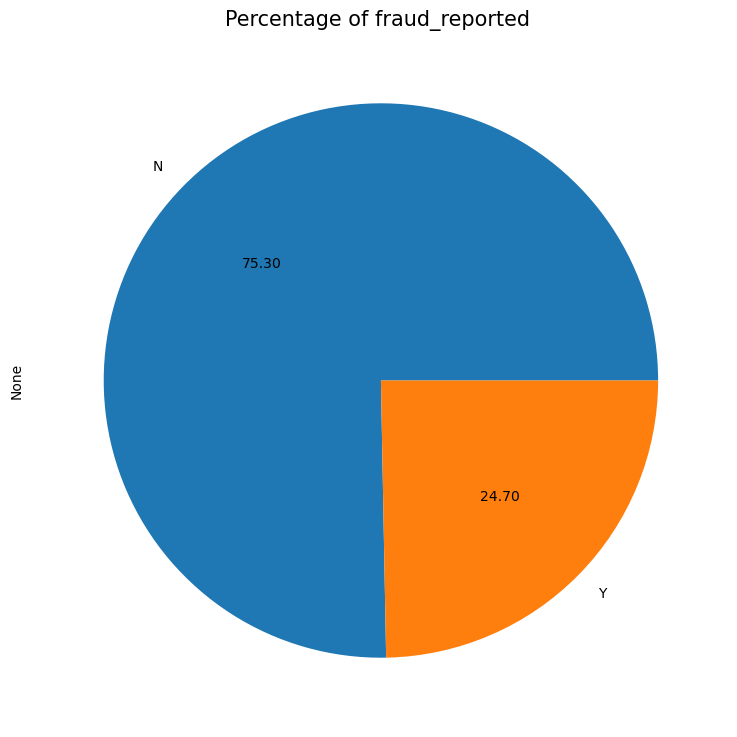

In [416]:
plt.figure(figsize=(15,9))
cat_feature.groupby('fraud_reported').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of fraud_reported ", fontsize =15)

Here we can see 24.70 percentage claims reported fraud.

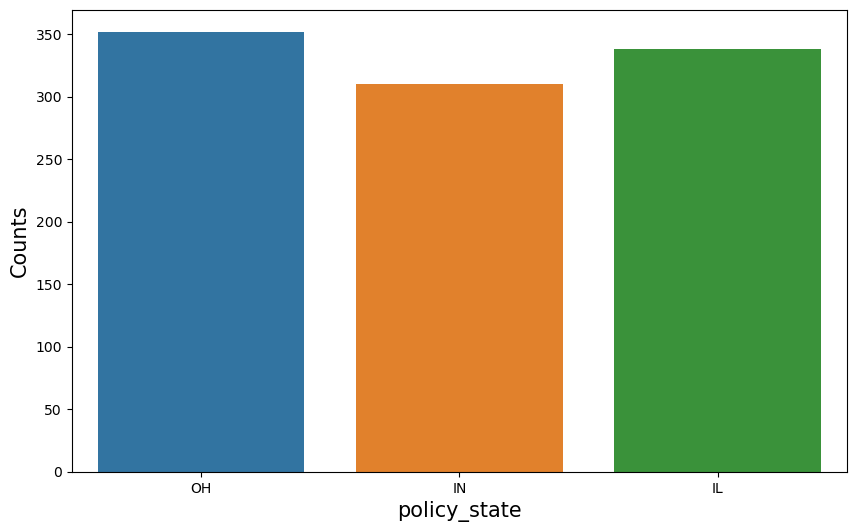

In [417]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['policy_state'])
plt.xlabel('policy_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Data is almost equally distributed within all the columns.


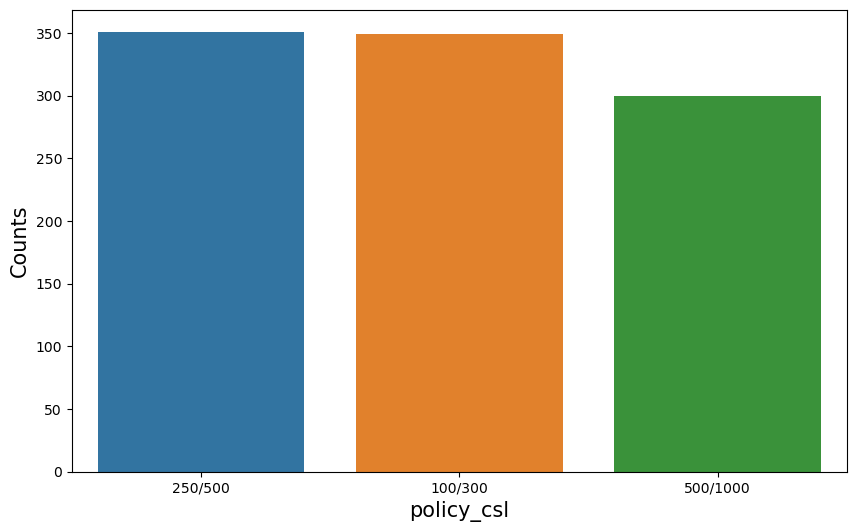

In [418]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['policy_csl'])
plt.xlabel('policy_csl', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

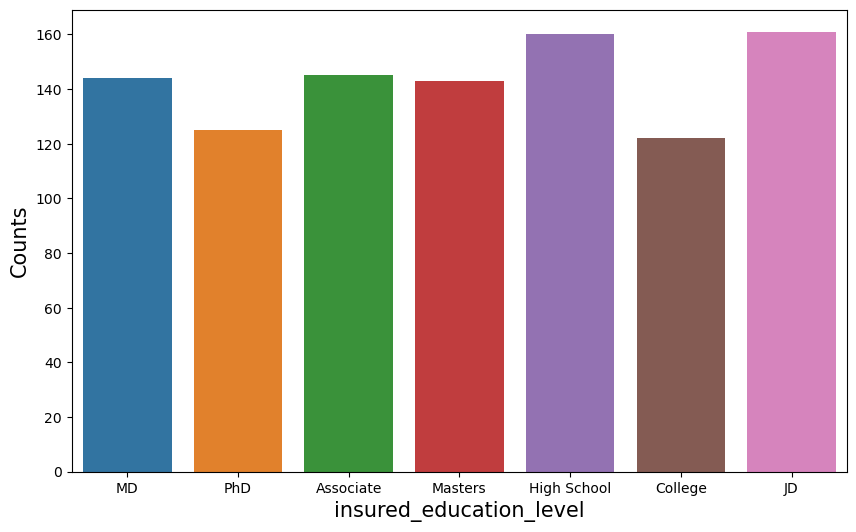

In [419]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['insured_education_level'])
plt.xlabel('insured_education_level', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

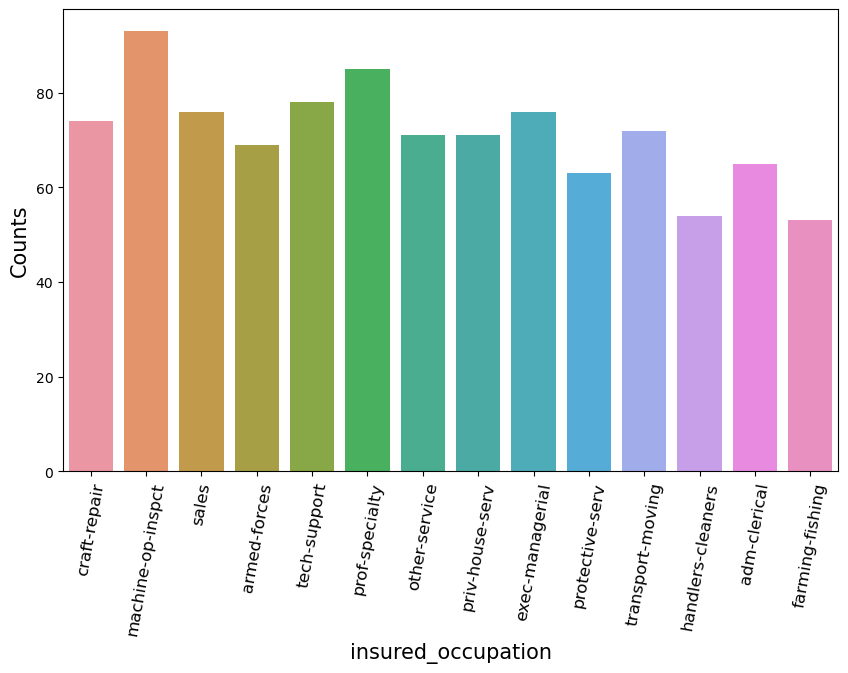

In [420]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['insured_occupation'])
plt.xlabel('insured_occupation', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

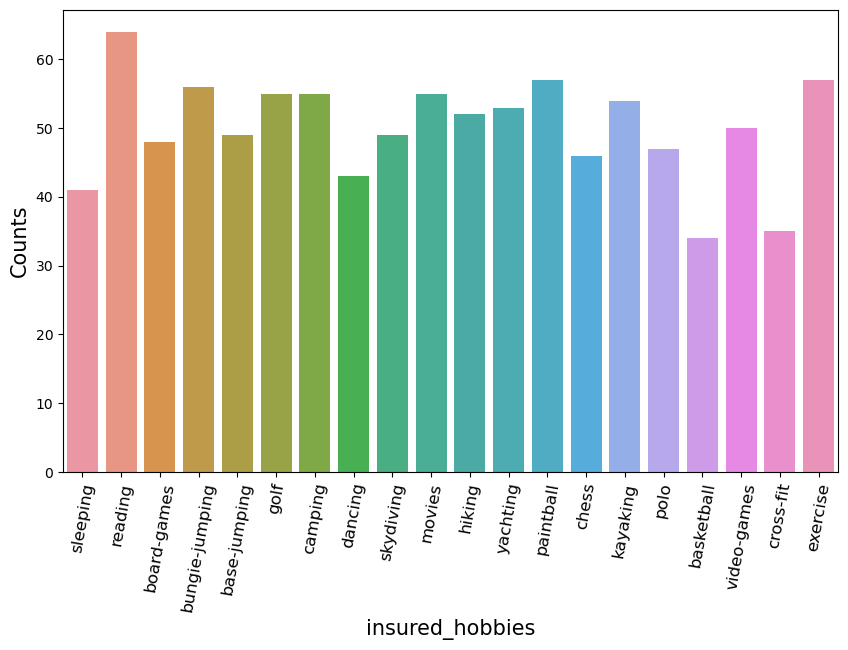

In [421]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['insured_hobbies'])
plt.xlabel('insured_hobbies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()


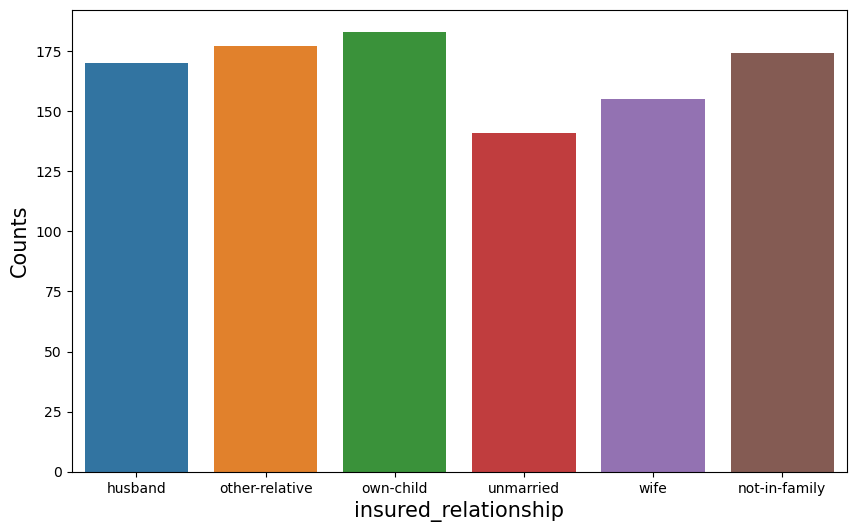

In [422]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['insured_relationship'])
plt.xlabel('insured_relationship', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

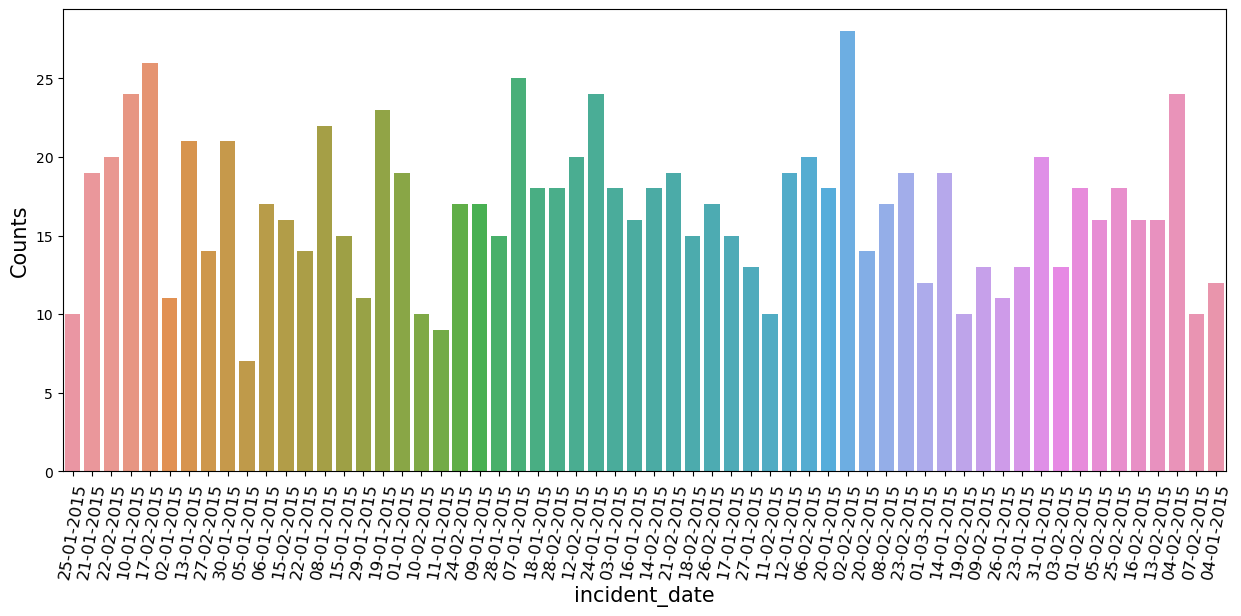

In [423]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['incident_date'])
plt.xlabel('incident_date', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

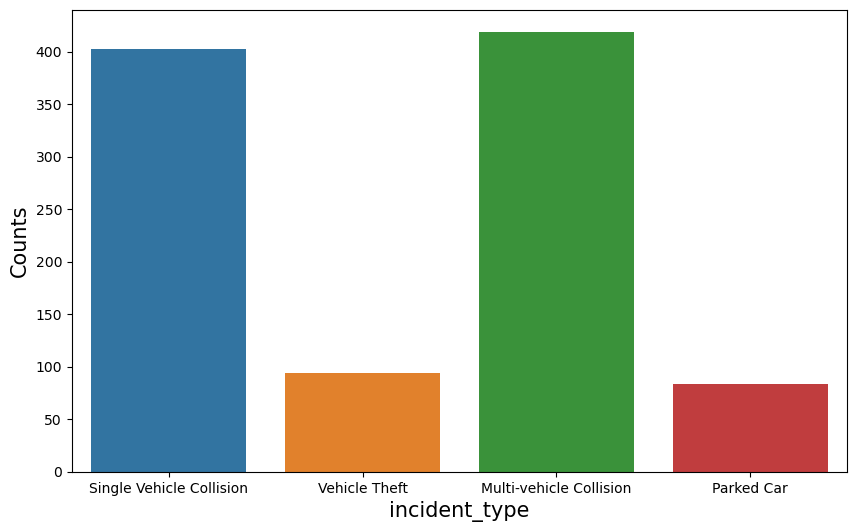

In [424]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['incident_type'])
plt.xlabel('incident_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

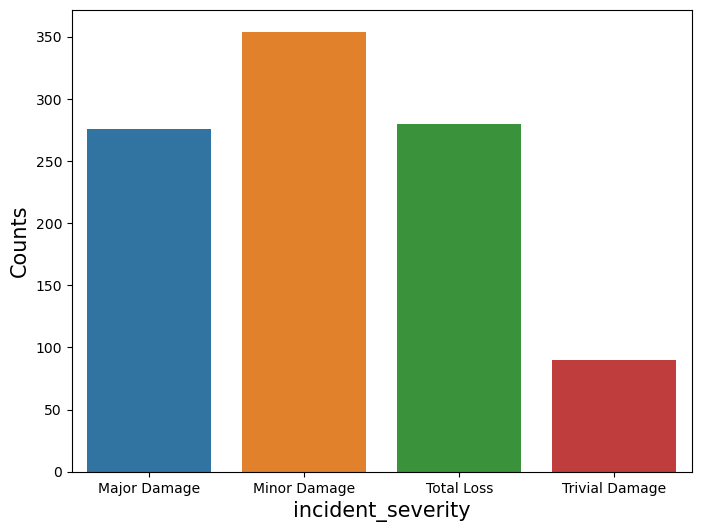

In [425]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['incident_severity'])
plt.xlabel('incident_severity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

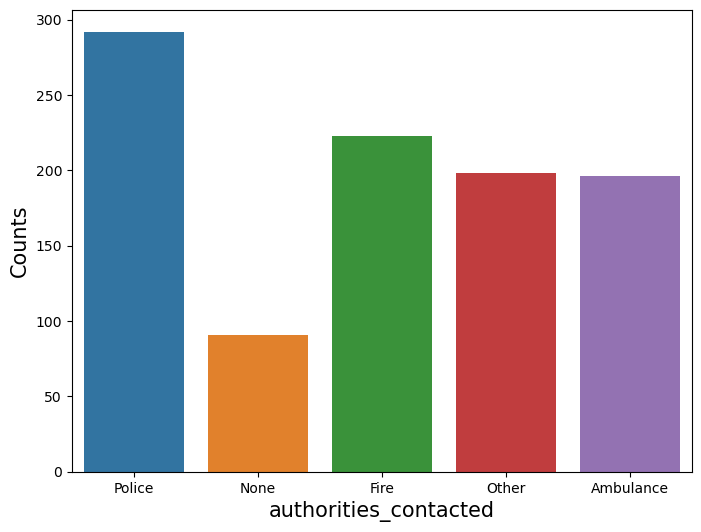

In [426]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['authorities_contacted'])
plt.xlabel('authorities_contacted', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

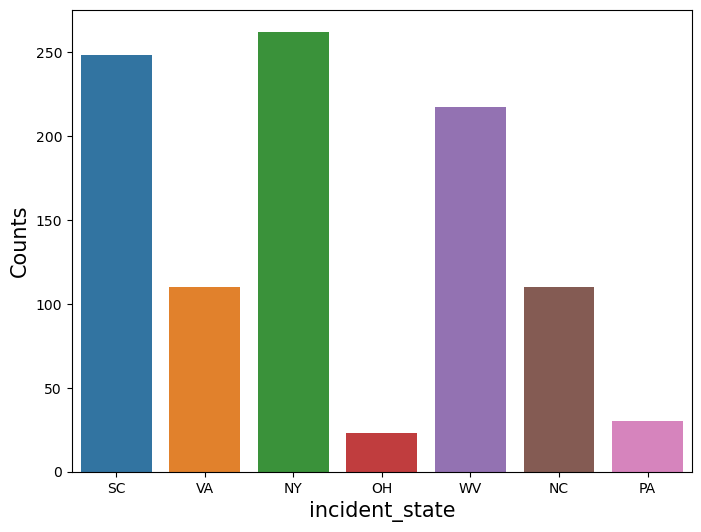

In [427]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['incident_state'])
plt.xlabel('incident_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

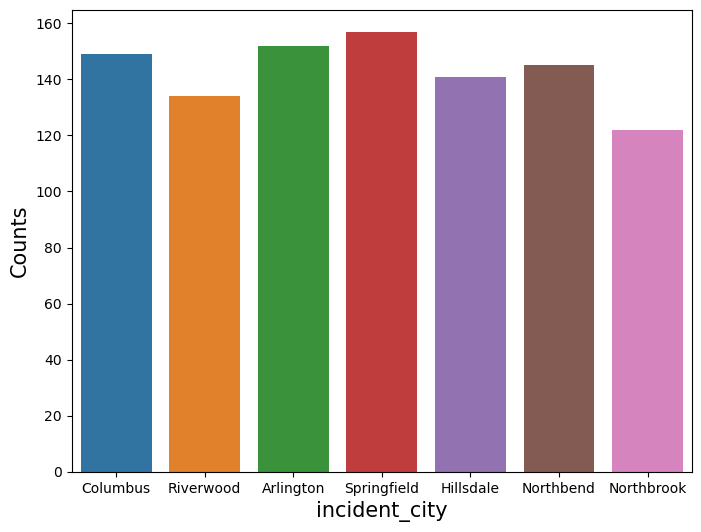

In [428]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['incident_city'])
plt.xlabel('incident_city', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

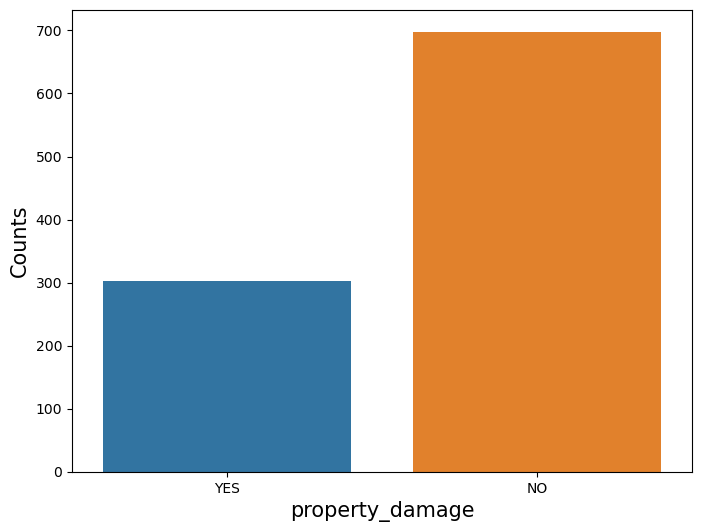

In [429]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['property_damage'])
plt.xlabel('property_damage', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

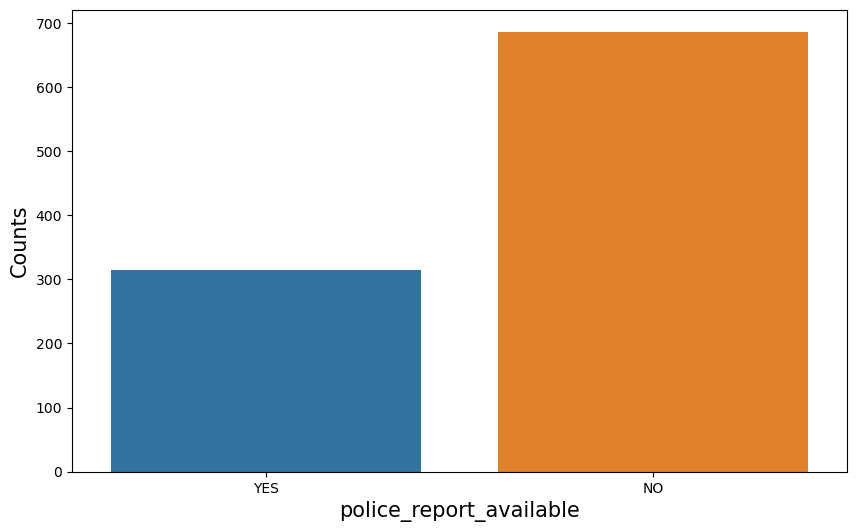

In [430]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['police_report_available'])
plt.xlabel('police_report_available', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

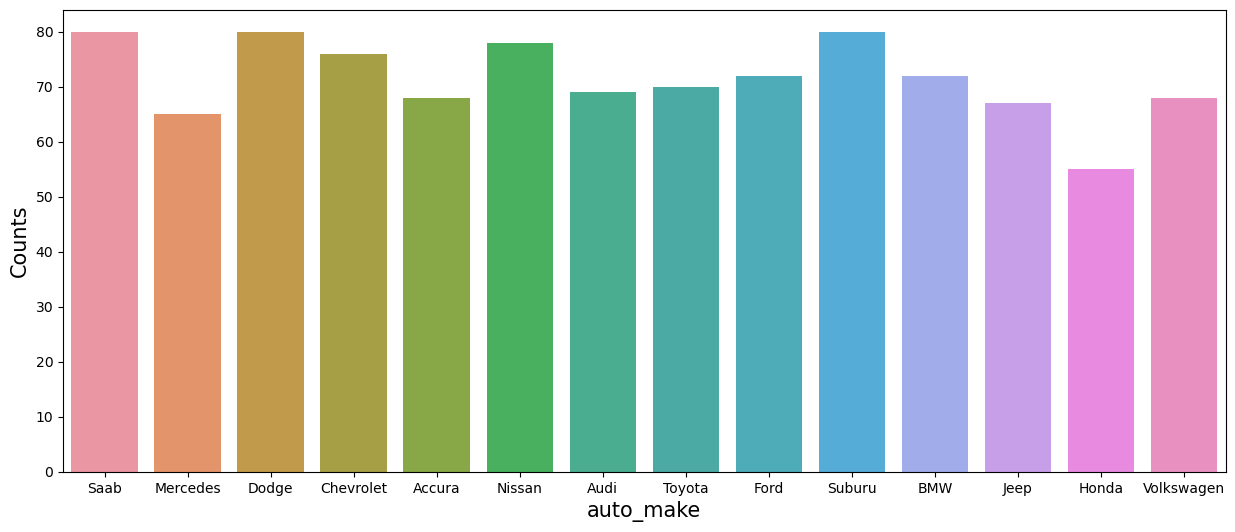

In [431]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['auto_make'])
plt.xlabel('auto_make', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

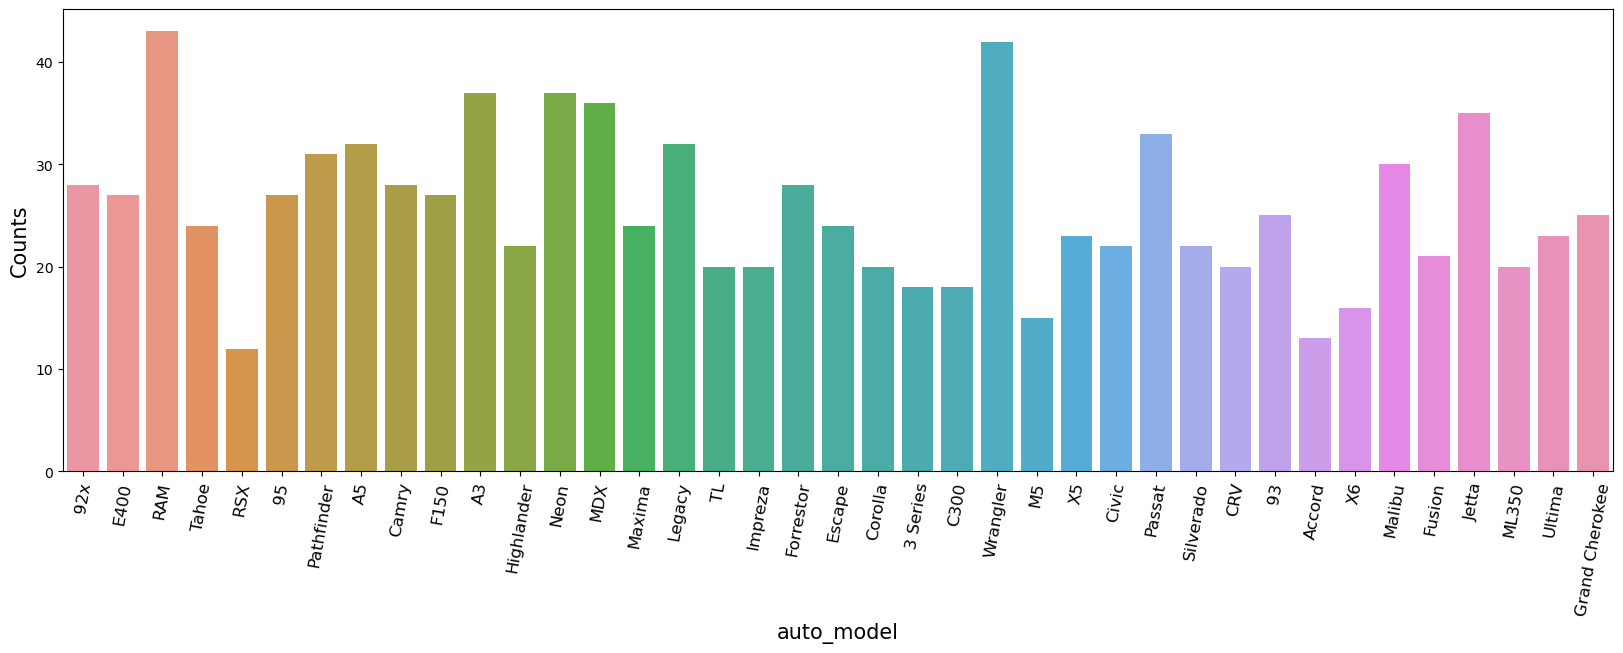

In [432]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['auto_model'])
plt.xlabel('auto_model', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)

plt.show()

policy_csl: Combined single limit is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident. Csl is distributed aslmost equal in all the categories.

Insured_sex : we can see most of the isured are Female. The count is greated than 500

Insured_education_level: High school and JD are same and higher than other numbers, data is distributed is all categories.

insured_occupation: Machine-op-inspct are more in number, after the we have considerable numbers for prof-spefialty, . tech support and sales.

insured_hobbies : Insurred with hobbies as reading are higher in number, so tendency to fraud is higher.

insured_relationship : Husband , not in family and other relatives have higher tendency to fraud.

incident_date: we can see 02-02-2015 reported higher incident.

incident_type: We can see Single-vehicle collision and Multi__vehicle- collision are the main incident types.

incident_severity : Numbers with minor damage are high.

authorities_contacted: Most of the cases police is contacted first.
incident_state: Mostly incident happen at NY and SC

incident_city : Springfield recoded the higher number of incident

property_damage : Near about 700 cases reported no property damage.

police_report_available: For near about 700 cases reported, plocie report not availble.

auto_make: Saab, Mercedes and Siburu are most common auto make

auto_model: incident report for RAM is higher.

In [433]:
num_feature= data.select_dtypes(include=[np.number])


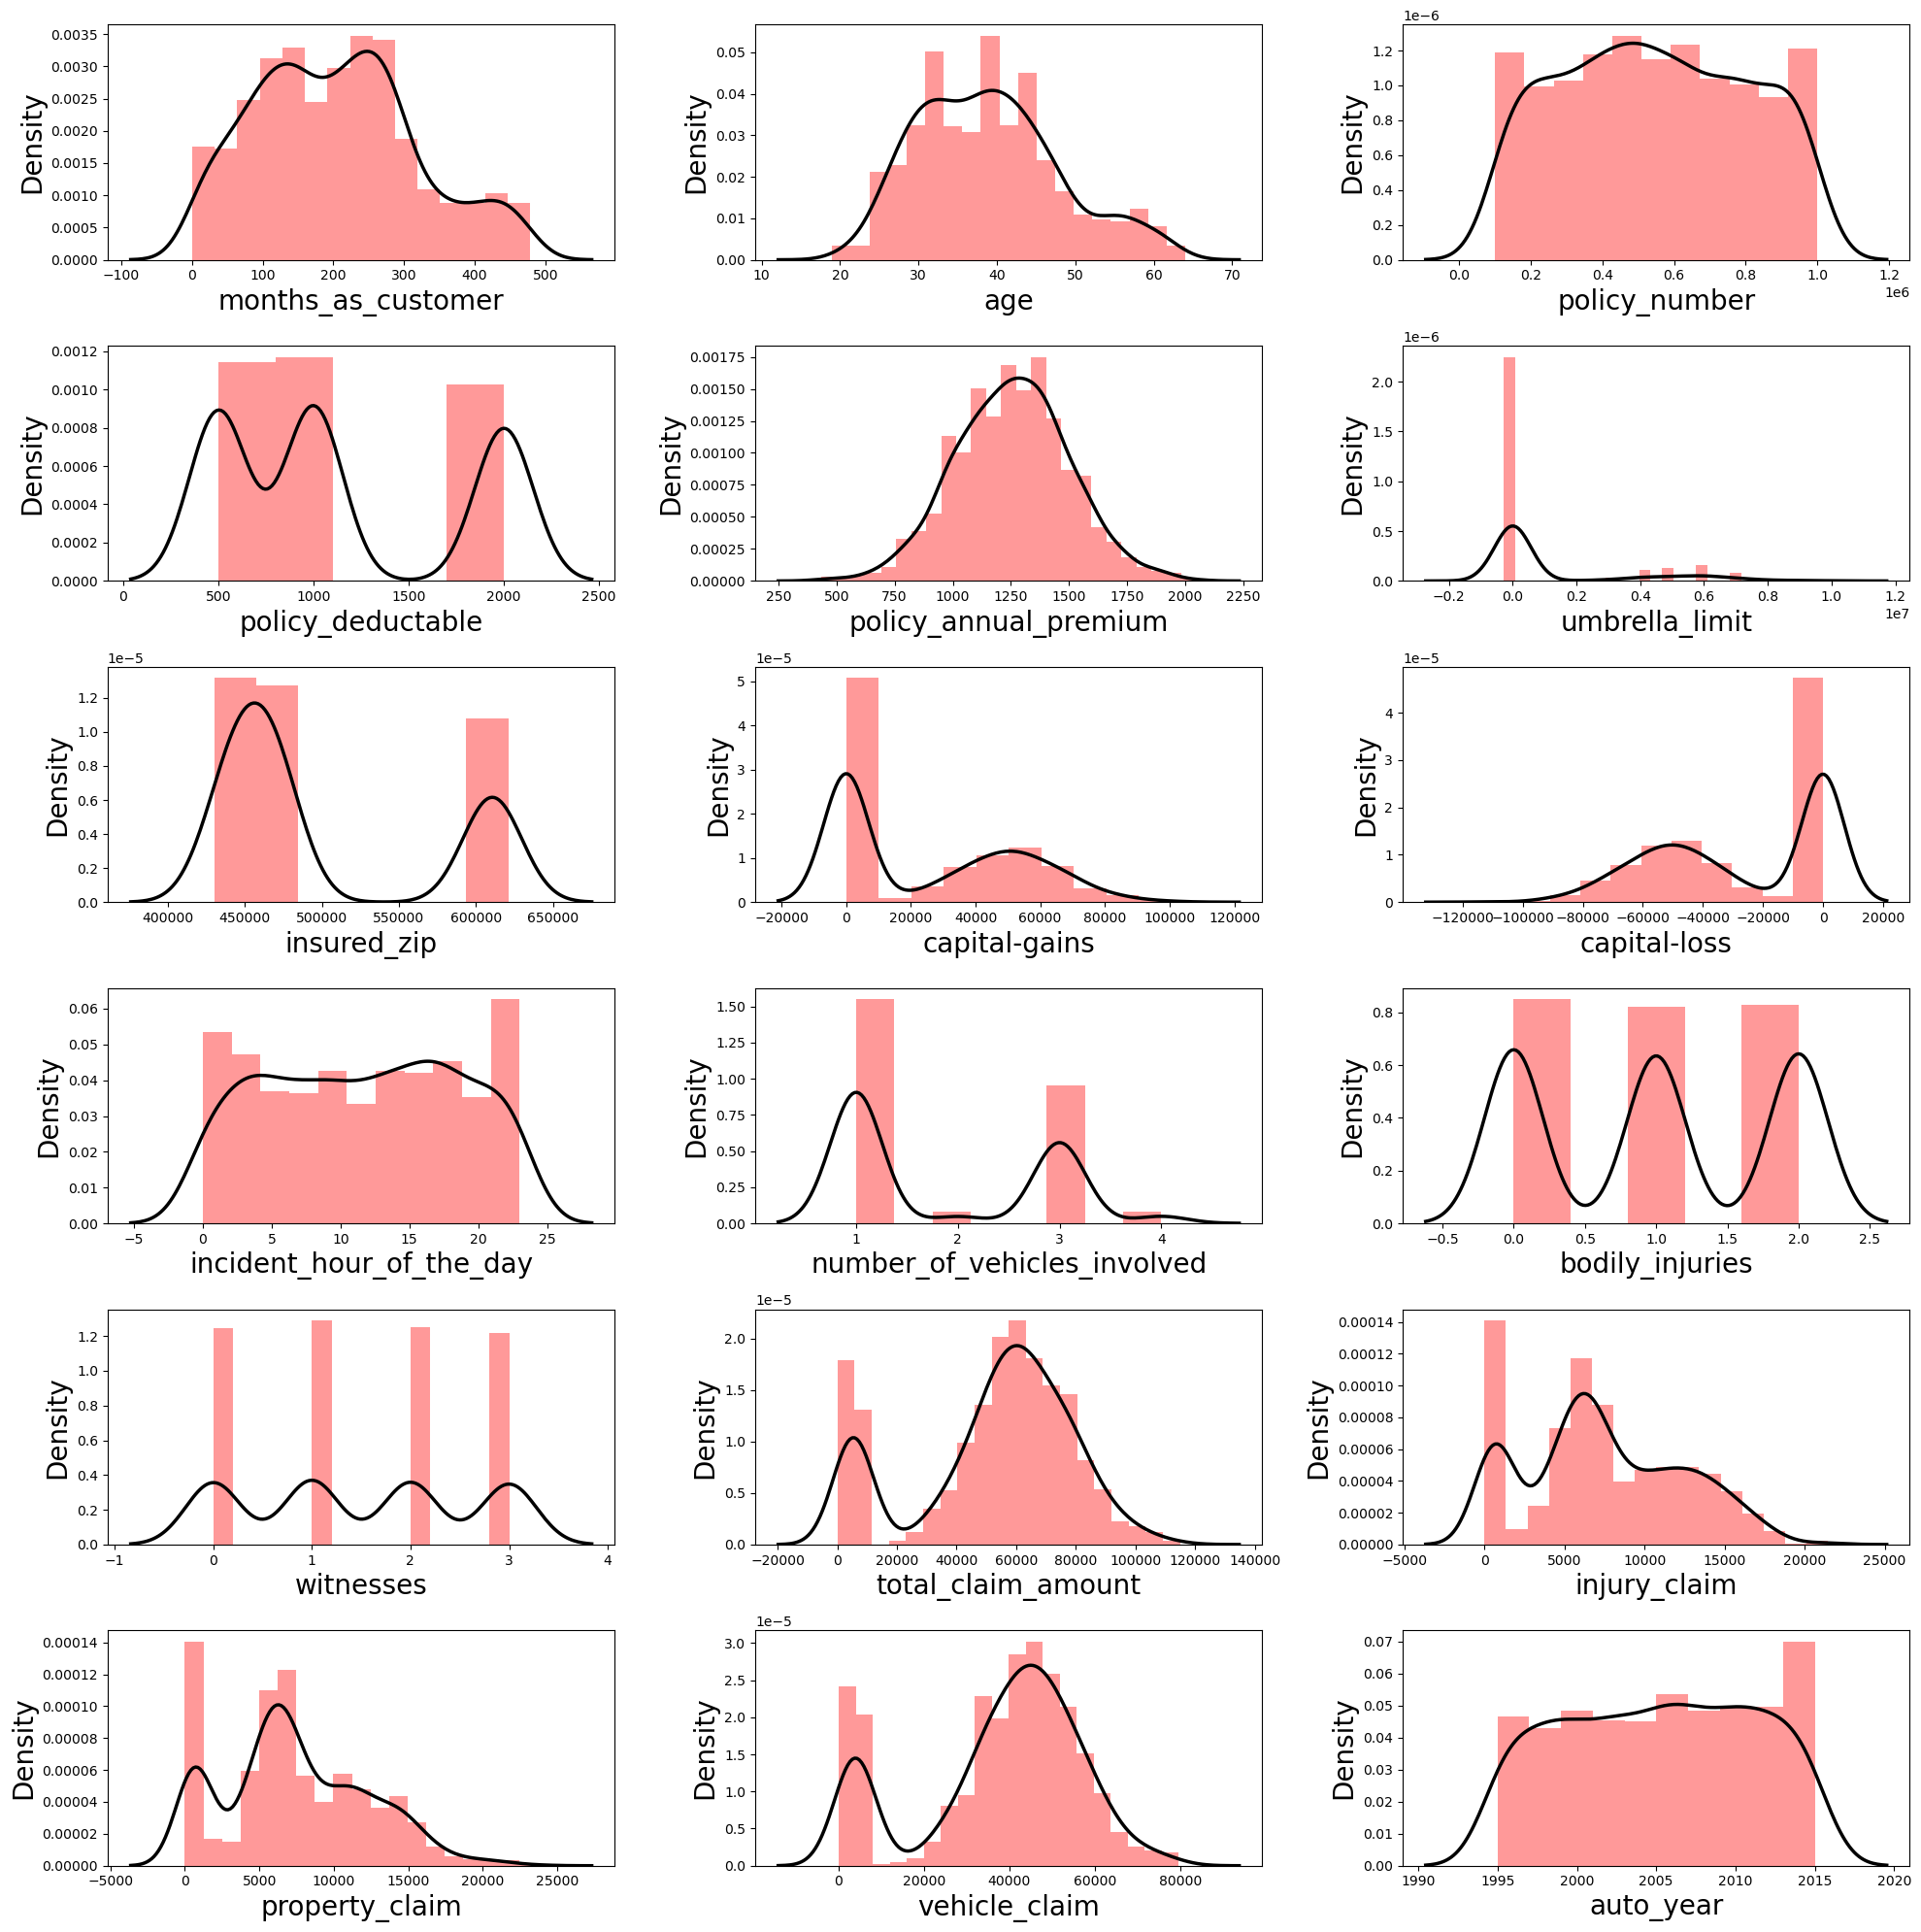

In [434]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber= 1

for column in num_feature:
    if plotnumber<=18:
        ax= plt.subplot(6,3, plotnumber)
        sns.distplot(num_feature[column],color='Red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

We can see our data is almost equally distributed.



Bi Variate and Multivariate analysis.


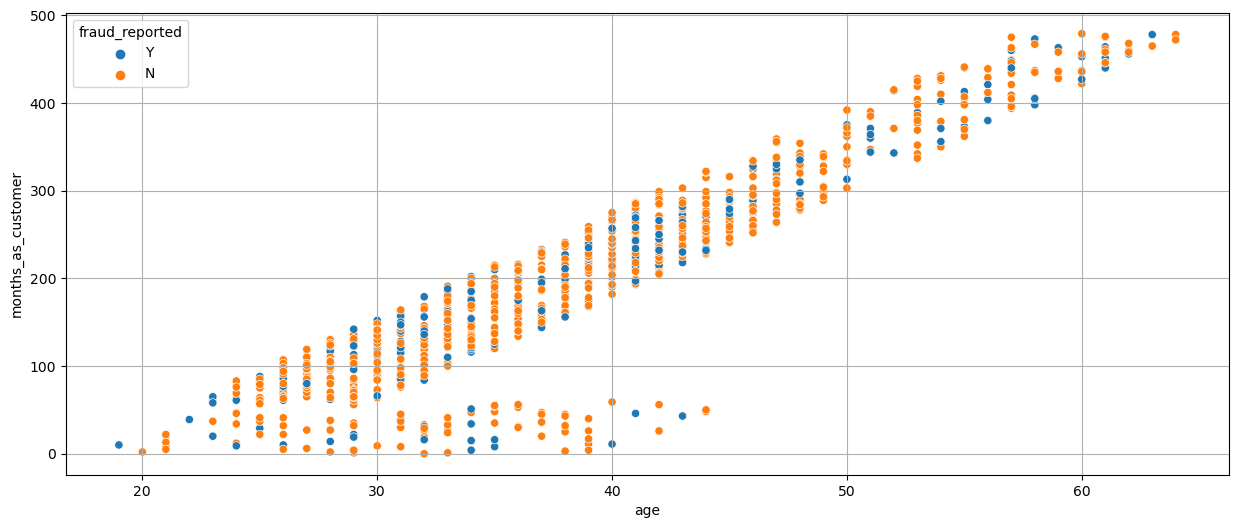

In [435]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

We can see there is not pattern which indicates, if the customers with more years with the compnay are clainming fraud insurance.

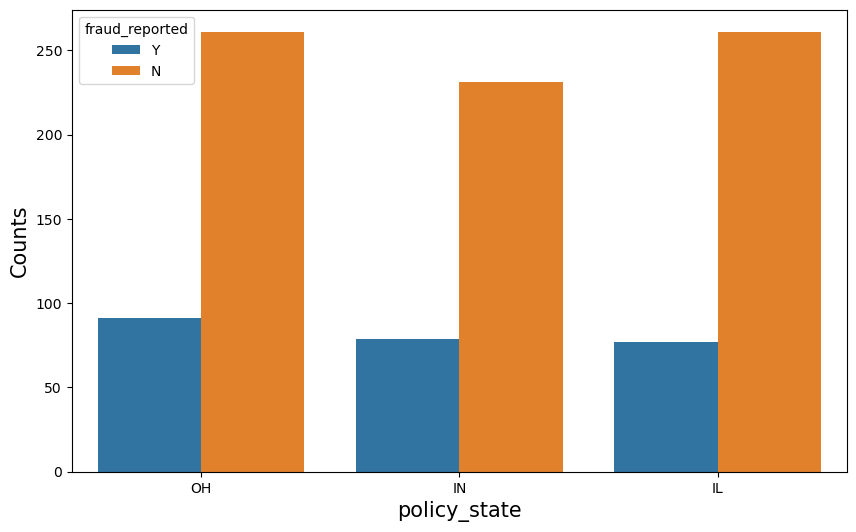

In [436]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_state', data= data, hue='fraud_reported')
plt.xlabel('policy_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see all the stats equally claiming the Fraud claim


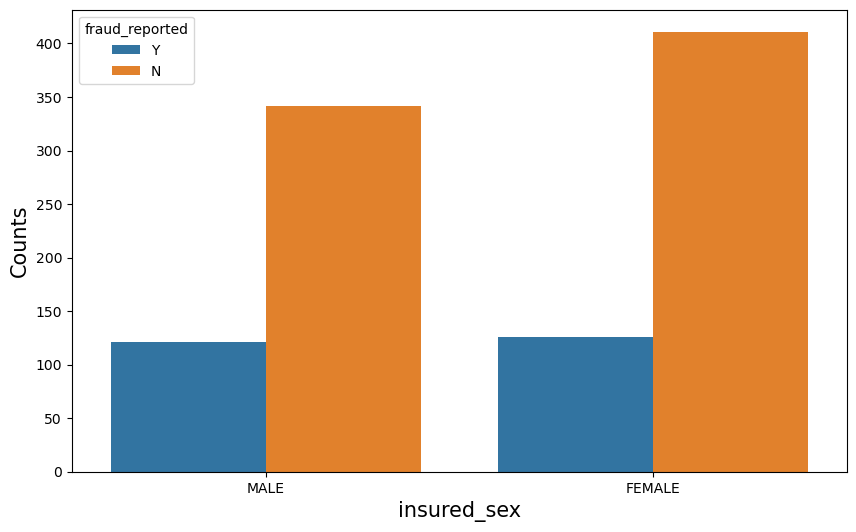

In [437]:

plt.figure(figsize=(10, 6))
sns.countplot(x='insured_sex', data= data, hue='fraud_reported')
plt.xlabel('insured_sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see male and female both are equaly claiming the Fraud claim.


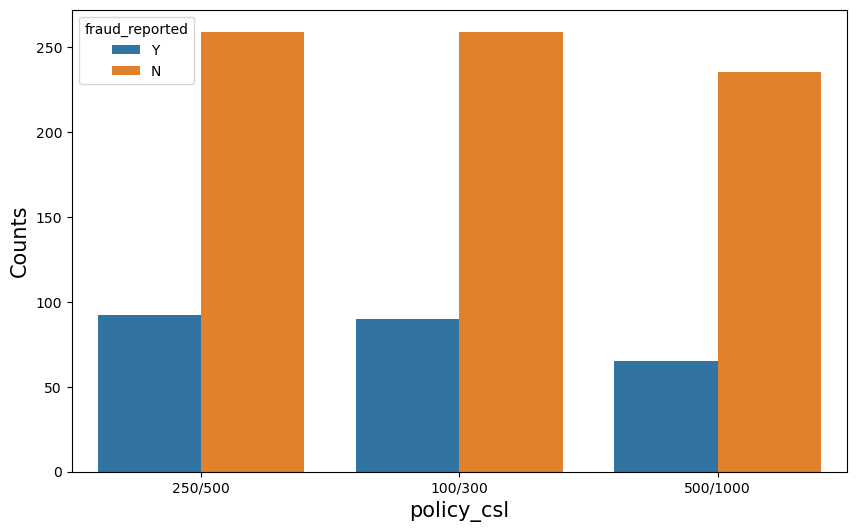

In [438]:

plt.figure(figsize=(10, 6))
sns.countplot(x='policy_csl', data= data, hue='fraud_reported')
plt.xlabel('policy_csl', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Fraud claims are more in 250/500 and 100/300

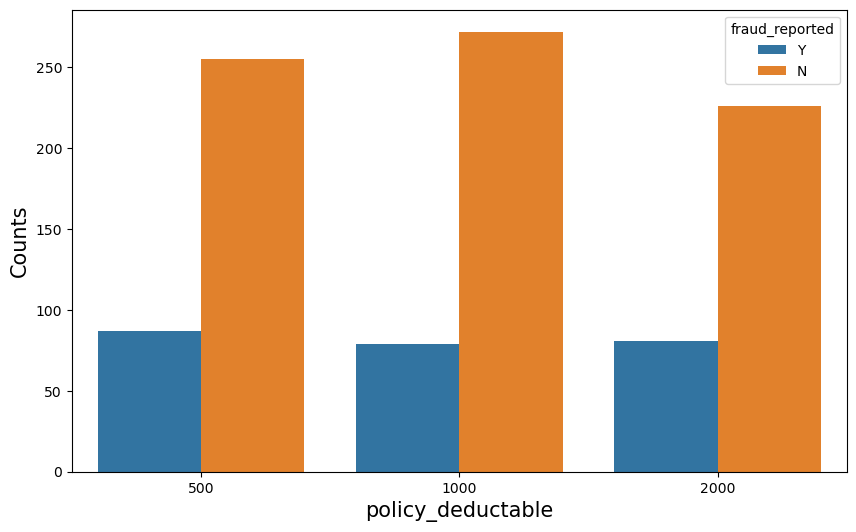

In [439]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_deductable', data= data, hue='fraud_reported')
plt.xlabel('policy_deductable', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In all policy_deductable Fraud claims are equal.

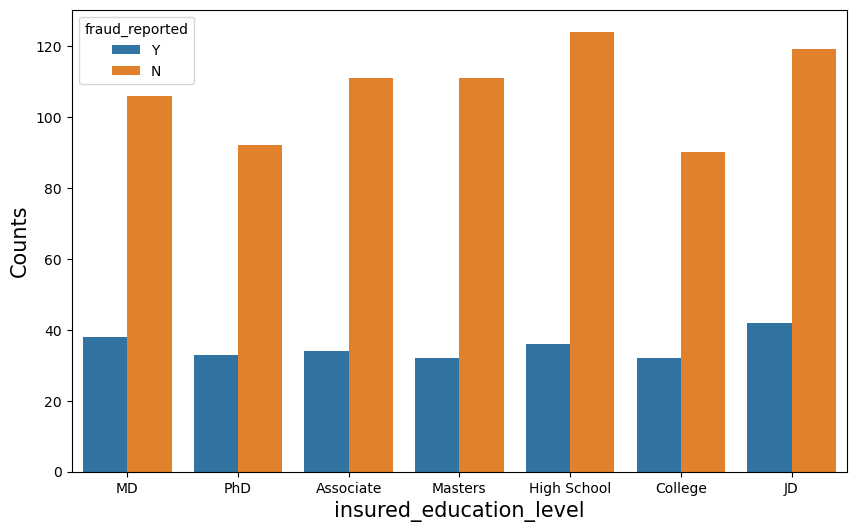

In [440]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_education_level', data= data, hue='fraud_reported')
plt.xlabel('insured_education_level', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We can see customers with insured_education_level as JD are more likely to claim fraud insurance


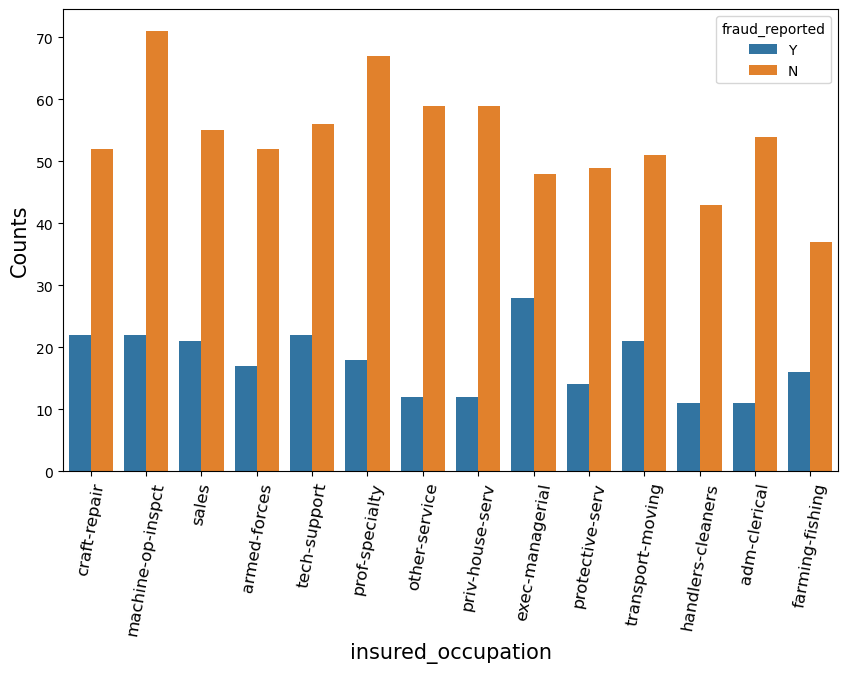

In [441]:

plt.figure(figsize=(10, 6))
sns.countplot(x='insured_occupation', data= data, hue='fraud_reported')
plt.xlabel('insured_occupation', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Customers with occupation as Exec-managerial are more likely to claim fraud Insurance.

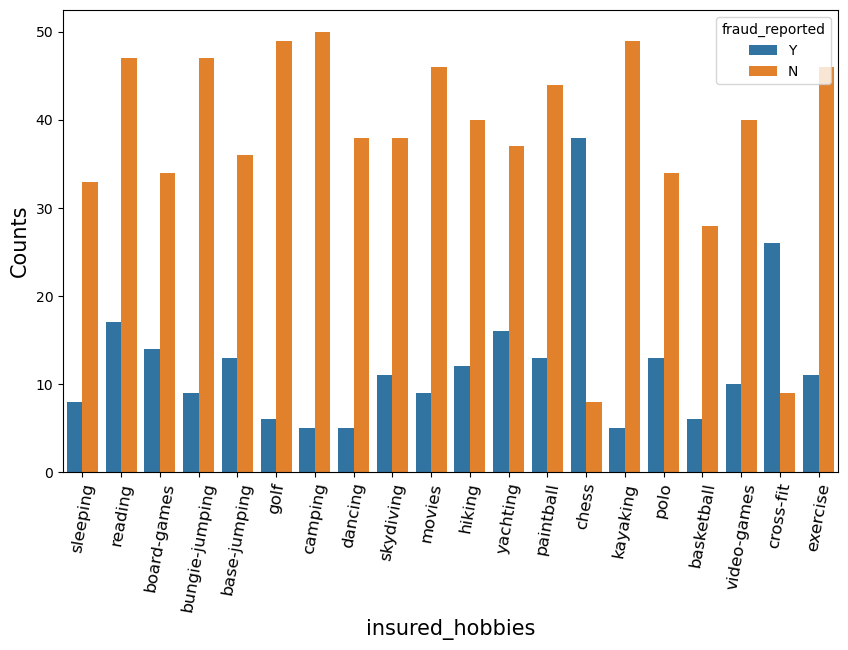

In [442]:

plt.figure(figsize=(10, 6))
sns.countplot(x='insured_hobbies', data= data, hue='fraud_reported')
plt.xlabel('insured_hobbies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Here we can see customers with hobbies as Chess player are more likely to claim fraud Insurance.

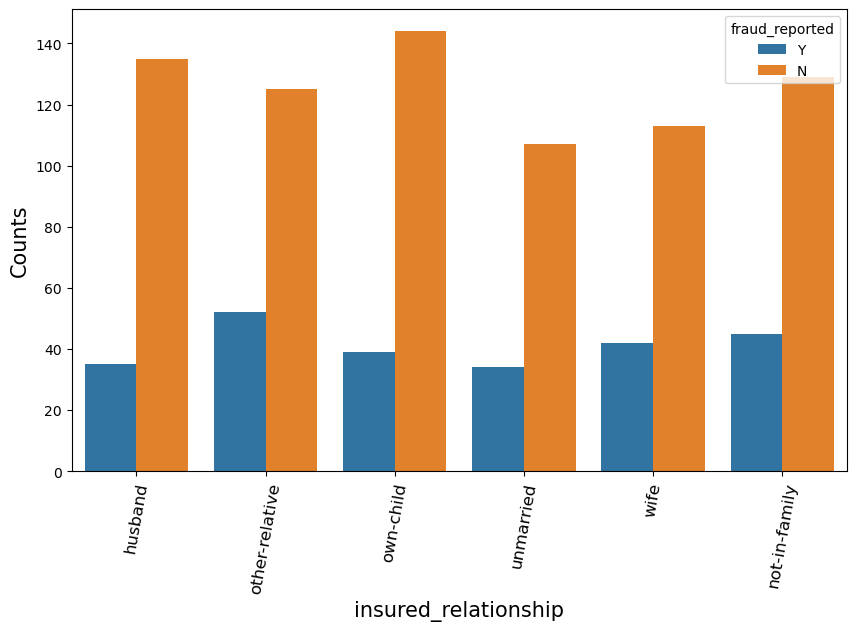

In [443]:

plt.figure(figsize=(10, 6))
sns.countplot(x='insured_relationship', data= data, hue='fraud_reported')
plt.xlabel('insured_relationship', fontsize=15)
plt.ylabel('Counts', fontsize=15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Other Relatives and Not- in- Family are more likely to claim Fraud Insurance.

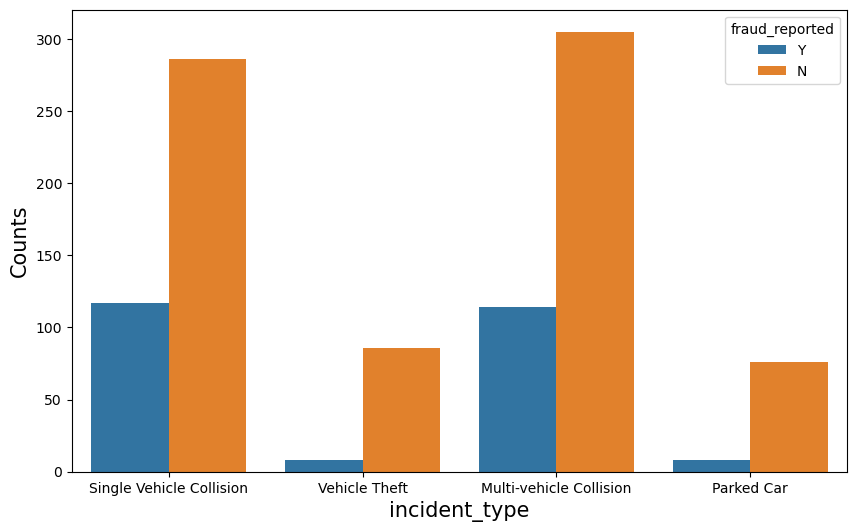

In [444]:

plt.figure(figsize=(10, 6))
sns.countplot(x='incident_type', data= data, hue='fraud_reported')
plt.xlabel('incident_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

In case of Single and Multivehicle collision, chance of Fraud Claim are high.


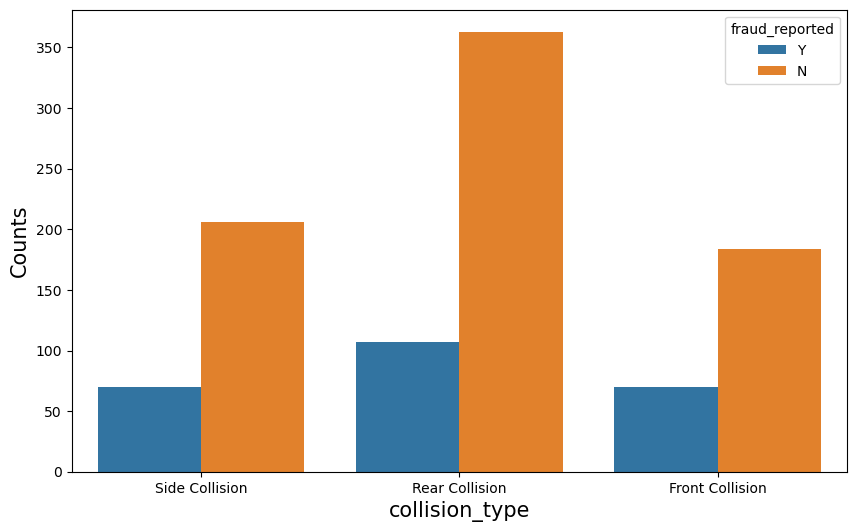

In [445]:

plt.figure(figsize=(10, 6))
sns.countplot(x='collision_type', data= data, hue='fraud_reported')
plt.xlabel('collision_type', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see in case of Rear_collision chances of Fraud calim are higher.


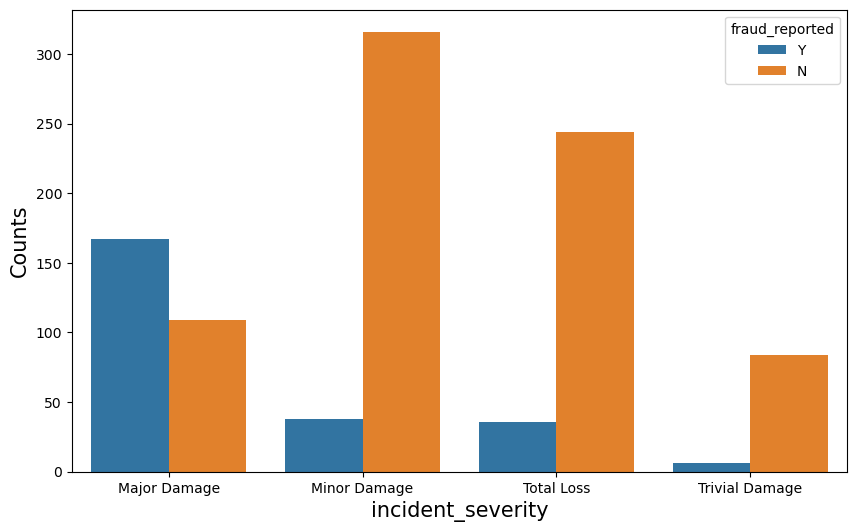

In [446]:

plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', data= data, hue='fraud_reported')
plt.xlabel('incident_severity', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Here we can see in case of major damage, Chances of Fraud claim insurance is highest.


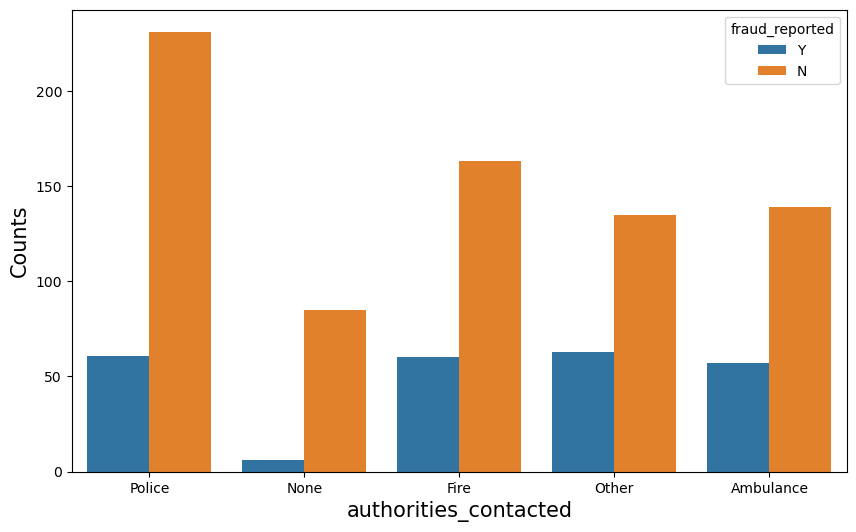

In [447]:

plt.figure(figsize=(10, 6))
sns.countplot(x='authorities_contacted', data= data, hue='fraud_reported')
plt.xlabel('authorities_contacted', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Here we can see when the inccident is reported to other, chances of Fraud claims are more.

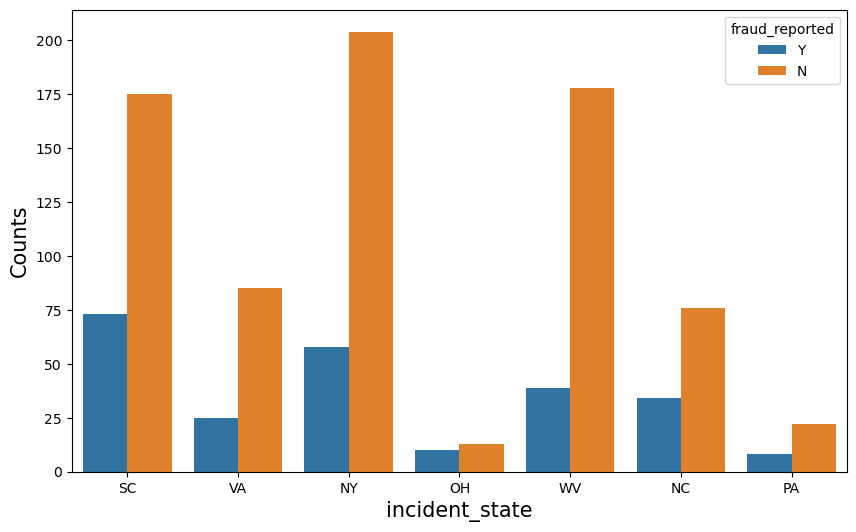

In [448]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_state', data= data, hue='fraud_reported')
plt.xlabel('incident_state', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

SC reported highets numbers of Fraud claims.


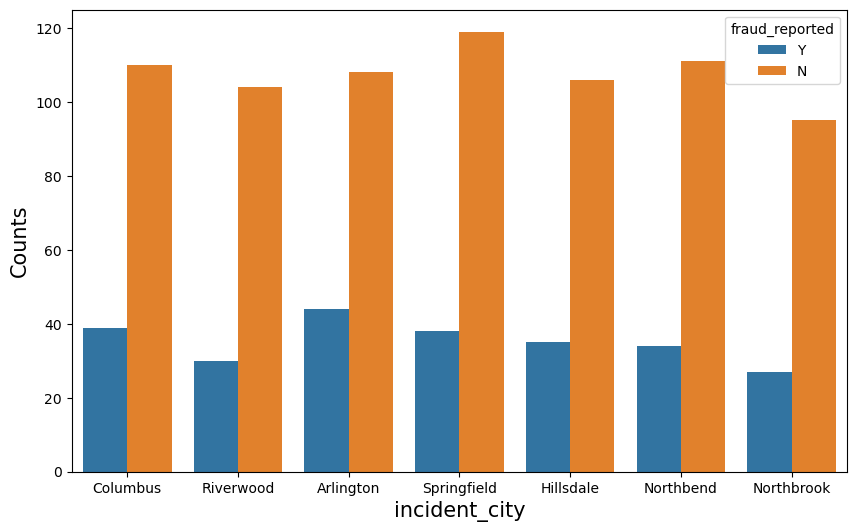

In [449]:

plt.figure(figsize=(10, 6))
sns.countplot(x='incident_city', data= data, hue='fraud_reported')
plt.xlabel('incident_city', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Arlington report higher numebers of false claims.

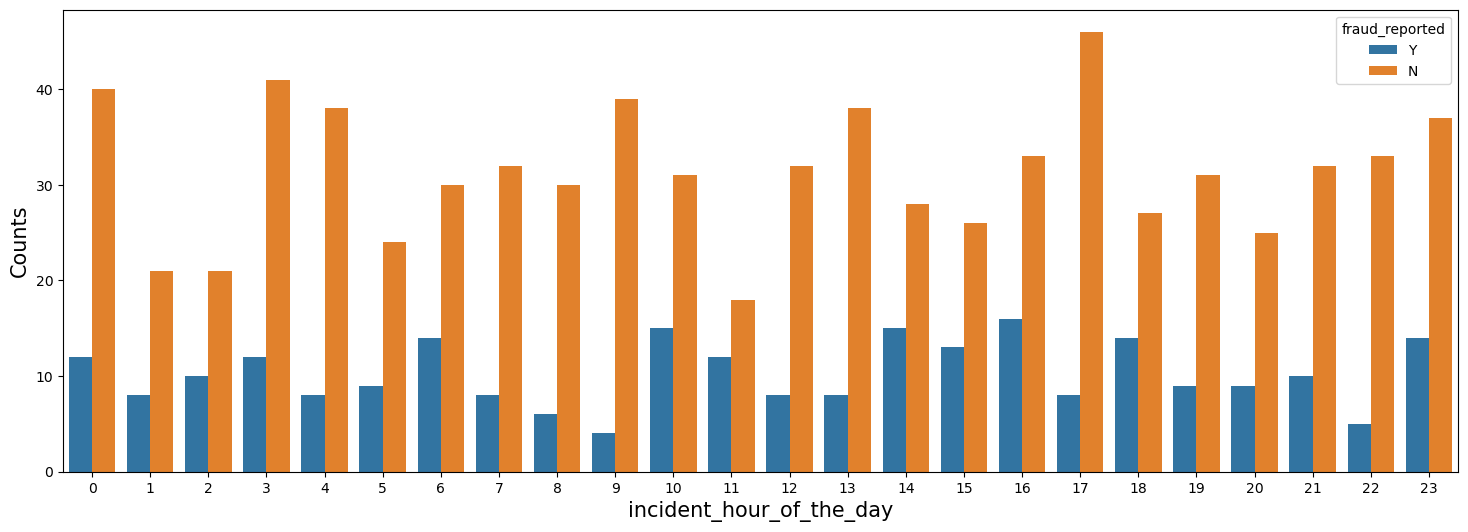

In [450]:

plt.figure(figsize=(18, 6))
sns.countplot(x='incident_hour_of_the_day', data= data, hue='fraud_reported')
plt.xlabel('incident_hour_of_the_day', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

incident_hour_of_the_day are not having very good relation with Fraud Reported


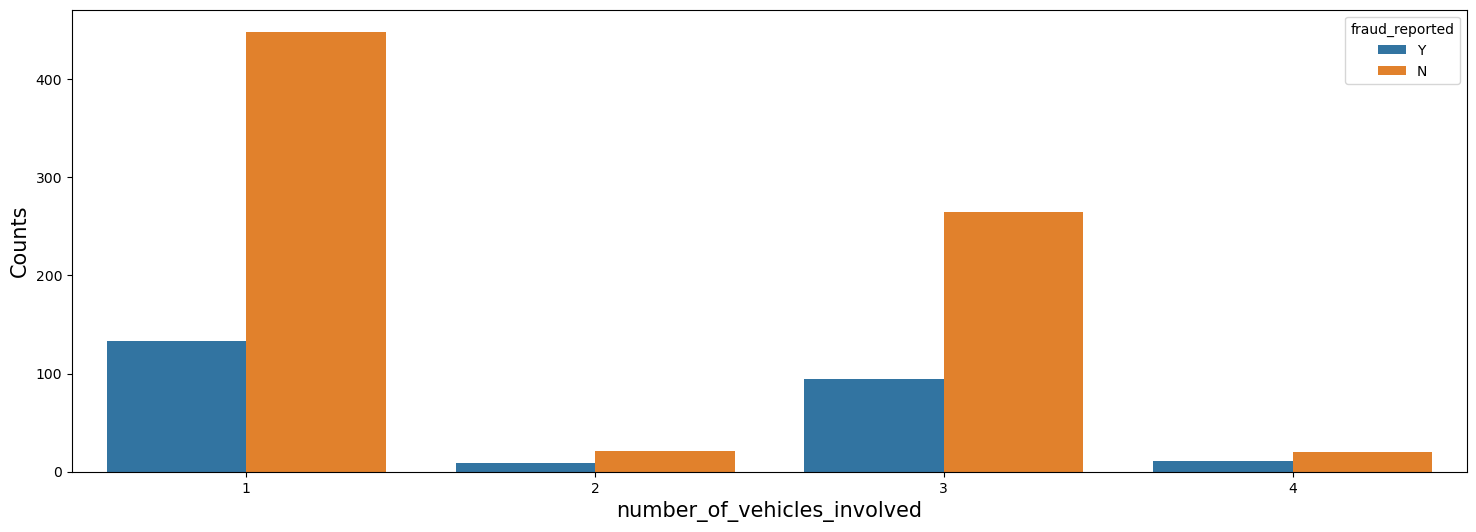

In [451]:

plt.figure(figsize=(18, 6))
sns.countplot(x='number_of_vehicles_involved', data= data, hue='fraud_reported')
plt.xlabel('number_of_vehicles_involved', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Incident with three vehicles are more likely have Fraud claim


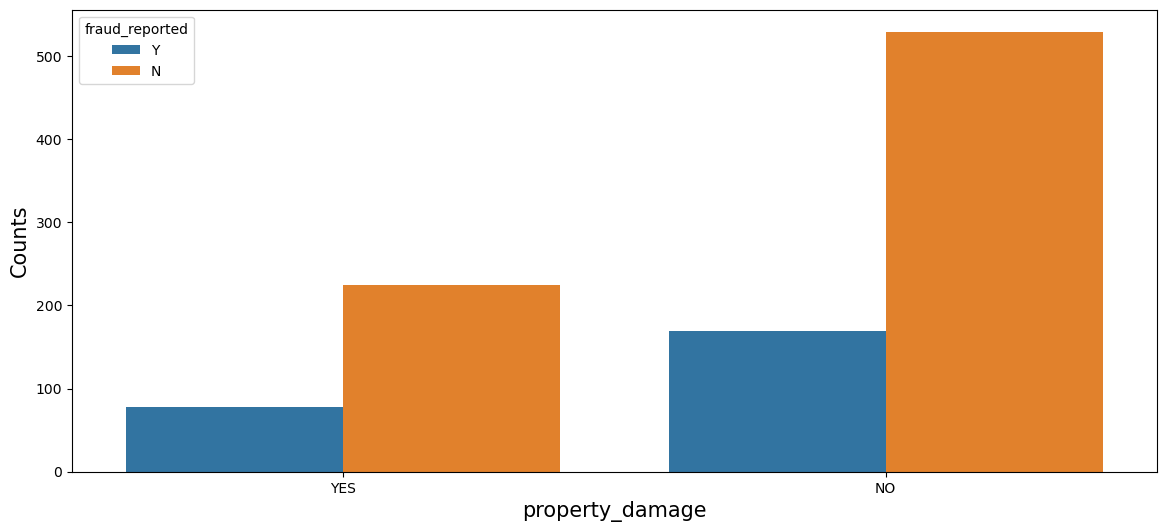

In [452]:

plt.figure(figsize=(14, 6))
sns.countplot(x='property_damage', data= data, hue='fraud_reported')
plt.xlabel('property_damage', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Fraud claim are reported in case of No property damage.

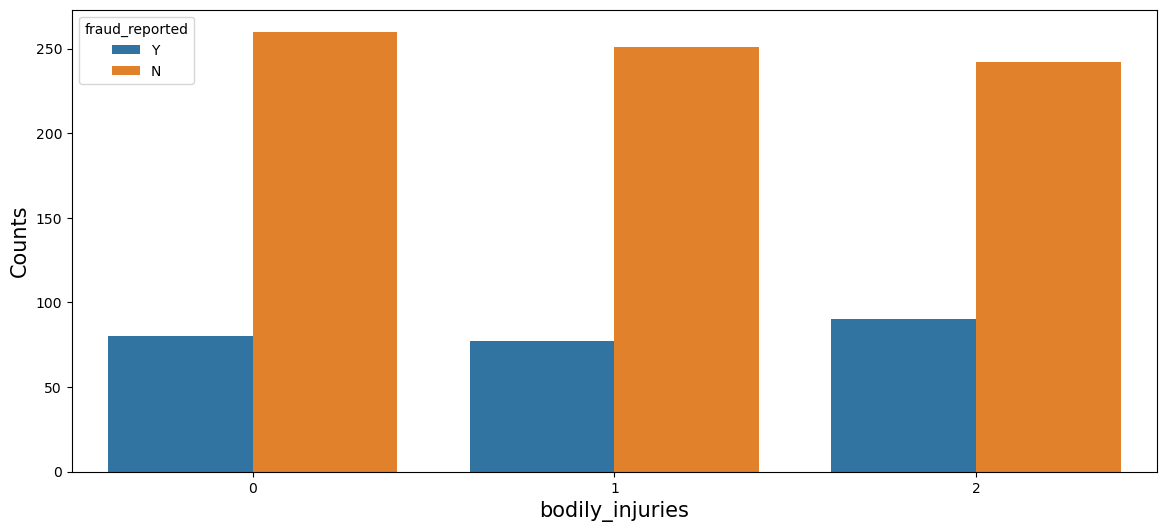

In [453]:

plt.figure(figsize=(14, 6))
sns.countplot(x='bodily_injuries', data= data, hue='fraud_reported')
plt.xlabel('bodily_injuries', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()


Here we can see chances for fraud claims are equaly likely.

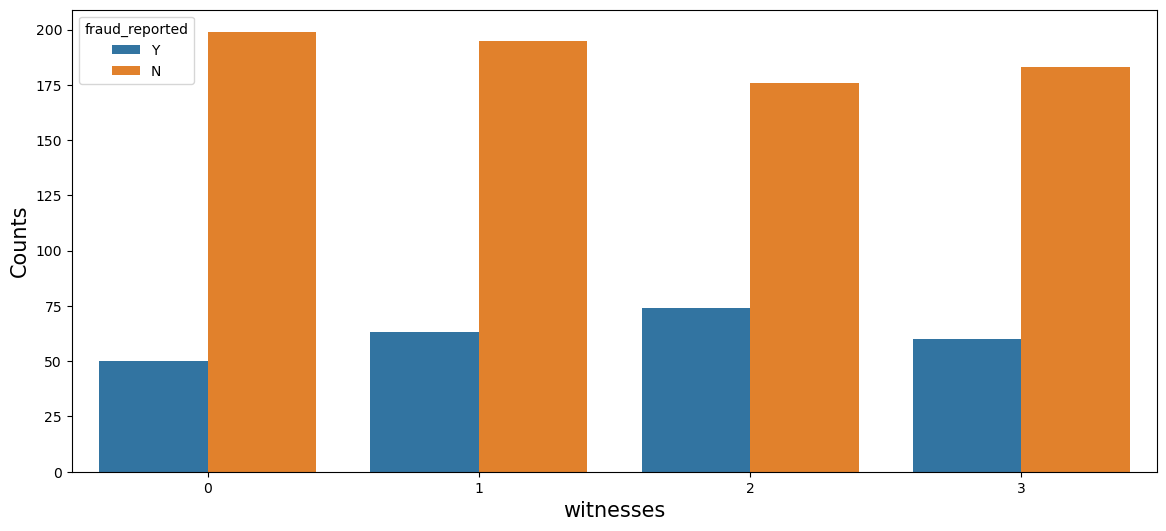

In [454]:

plt.figure(figsize=(14, 6))
sns.countplot(x='witnesses', data= data, hue='fraud_reported')
plt.xlabel('witnesses', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see Incident with 2 witnesses are having more chance of Fraud.


plt.figure(figsize=(14, 6))
sns.countplot(x='police_report_available', data= data, hue='fraud_reported')
plt.xlabel('police_report_available', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

We can see in an incident where police report is not available, chances of fraud claims Increases.

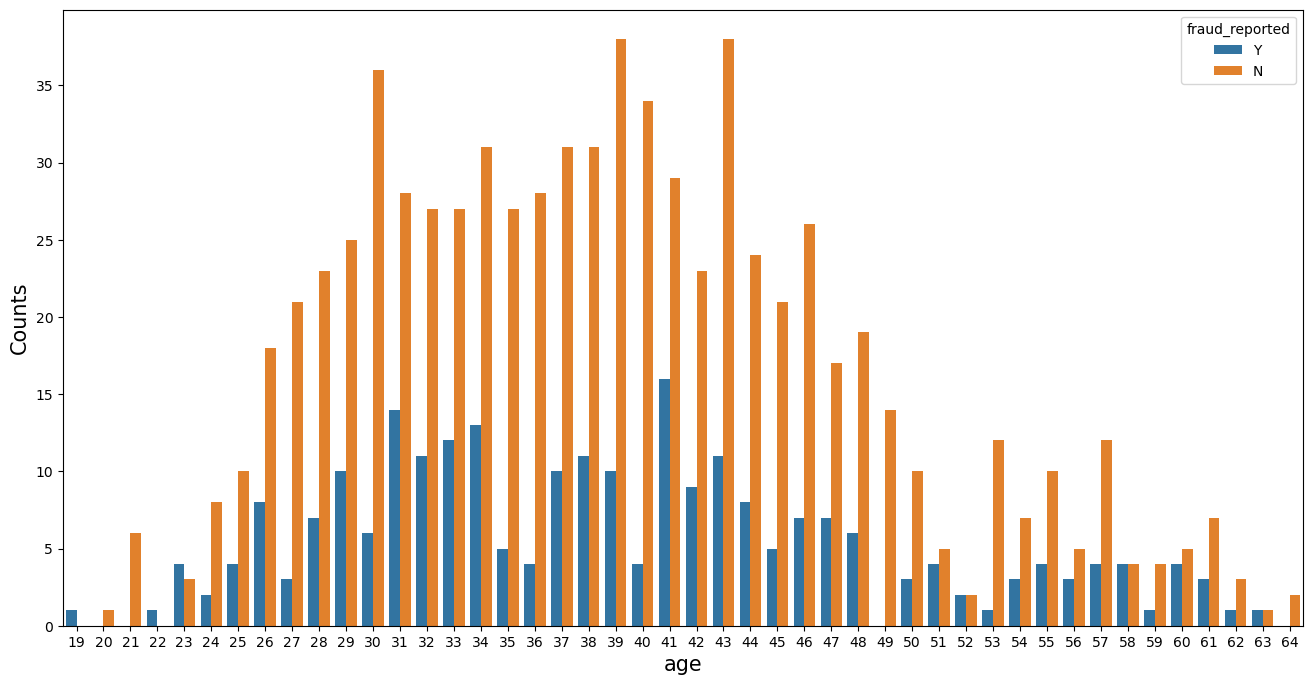

In [455]:

plt.figure(figsize=(16,8))
sns.countplot(x='age', data= data, hue='fraud_reported')
plt.xlabel('age', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

Are group 31 t0 41 are more likely to have Fraud claim.

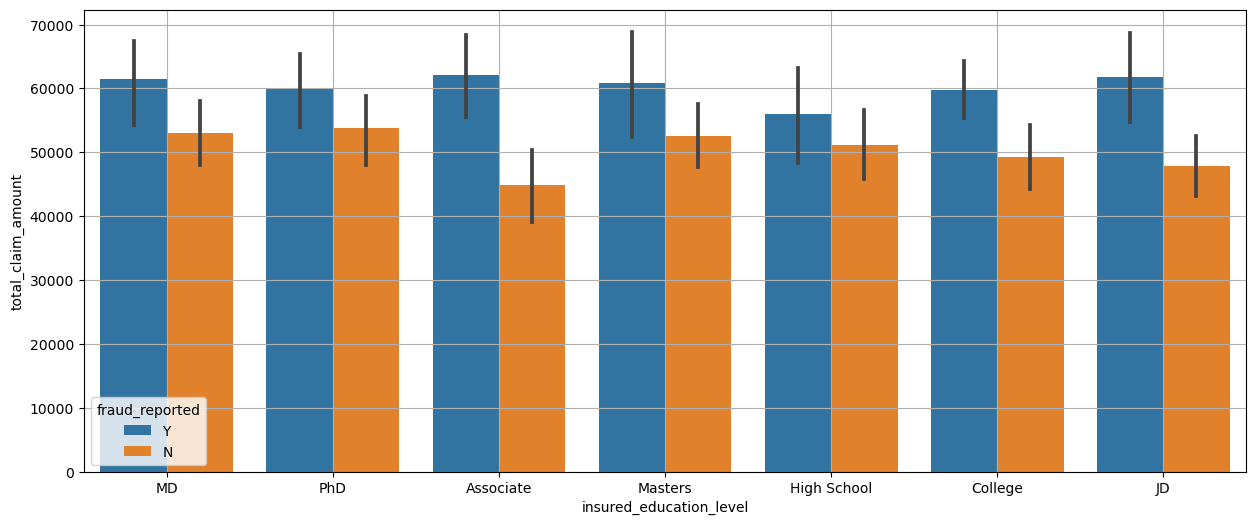

In [456]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_education_level',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see Associate , JD, MD and Masters are claiming almost same amount As Fraud claim Insurance.


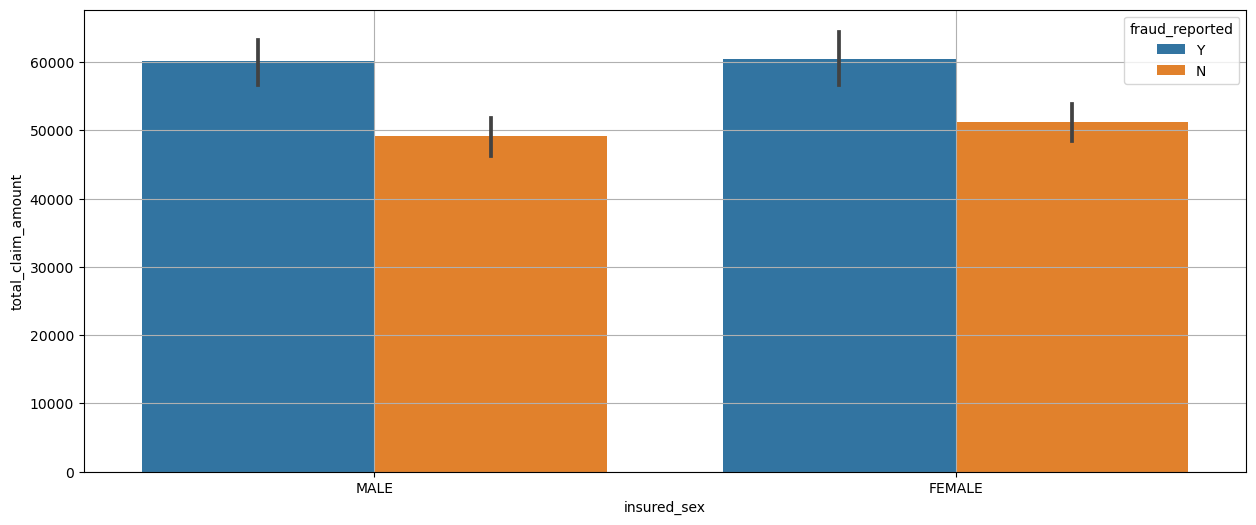

In [457]:

plt.figure(figsize=(15,6))
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see both males and female claiming same amount, in form of Fraud claim


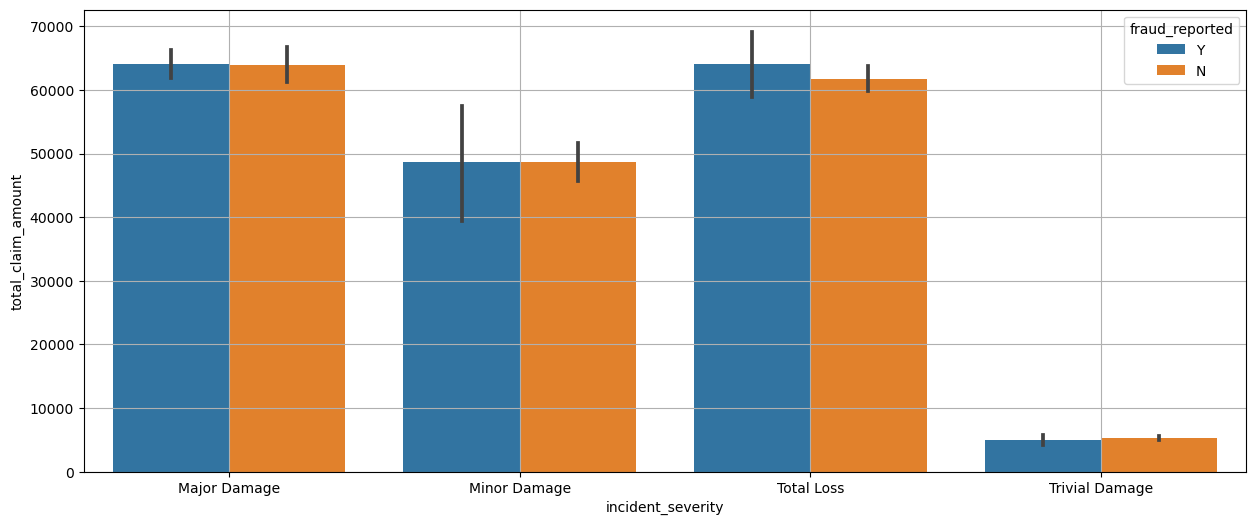

In [458]:

plt.figure(figsize=(15,6))
sns.barplot(x='incident_severity',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

False claim in case of Major damage and Total loss is higher.


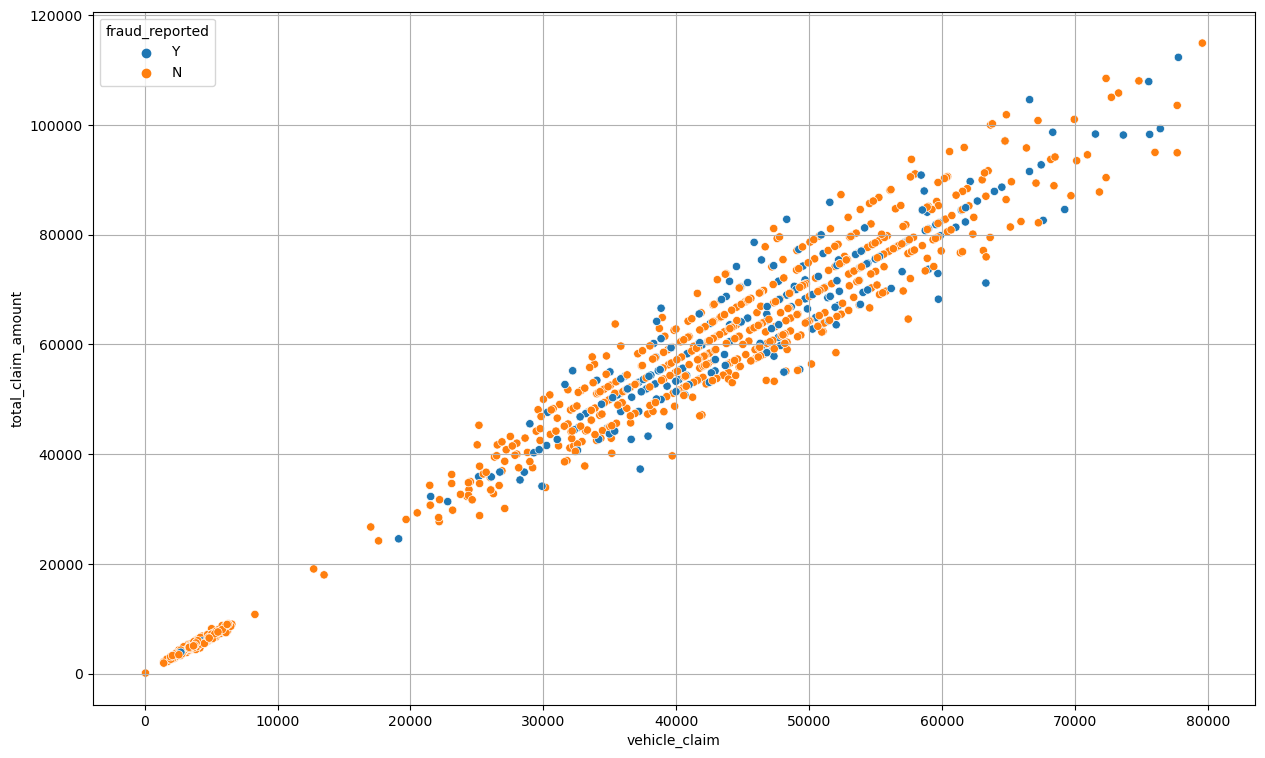

In [459]:

plt.figure(figsize=(15,9))
sns.scatterplot(x='vehicle_claim', y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
plt.show()

Here we can see there is no direct relation with false claim between vehicle claim and Total claim amaount.

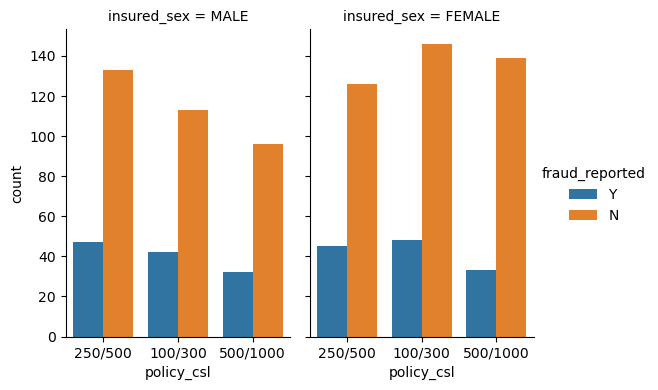

In [460]:
sns.catplot(x="policy_csl", hue="fraud_reported", col="insured_sex", data=data, kind="count",height=4, aspect=.7)

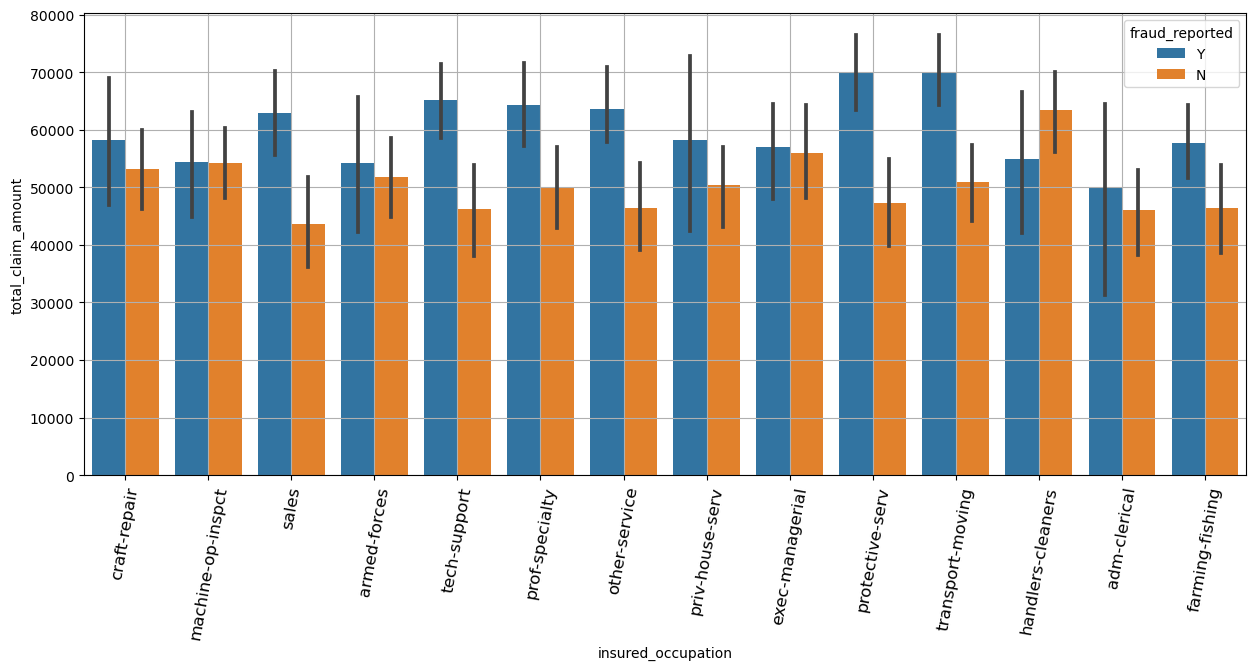

In [461]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_occupation',y='total_claim_amount',hue='fraud_reported',data=data)
plt.grid(True)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Here we can see customers with occupation as Protective Serv and transport moving claimed higher amount.


<AxesSubplot: xlabel='total_claim_amount', ylabel='Density'>

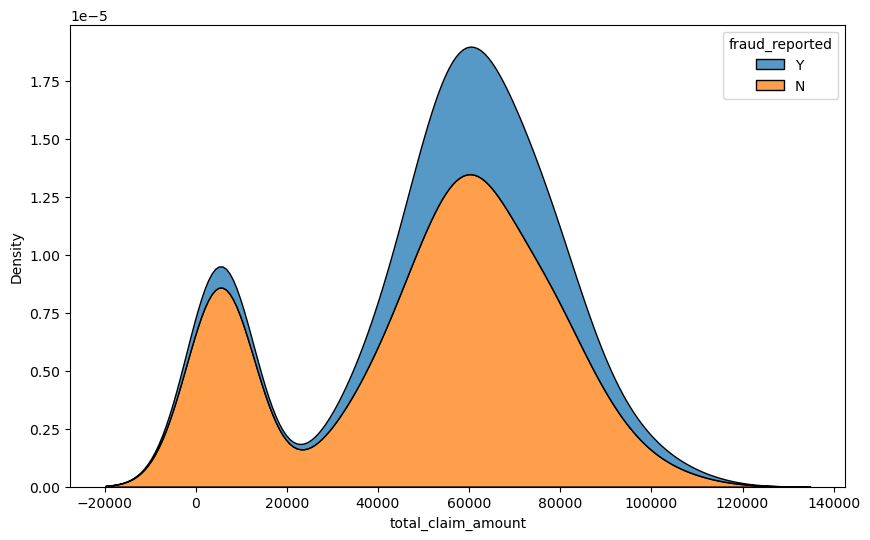

In [462]:

plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="total_claim_amount", hue="fraud_reported", multiple="stack")

<AxesSubplot: xlabel='vehicle_claim', ylabel='Density'>

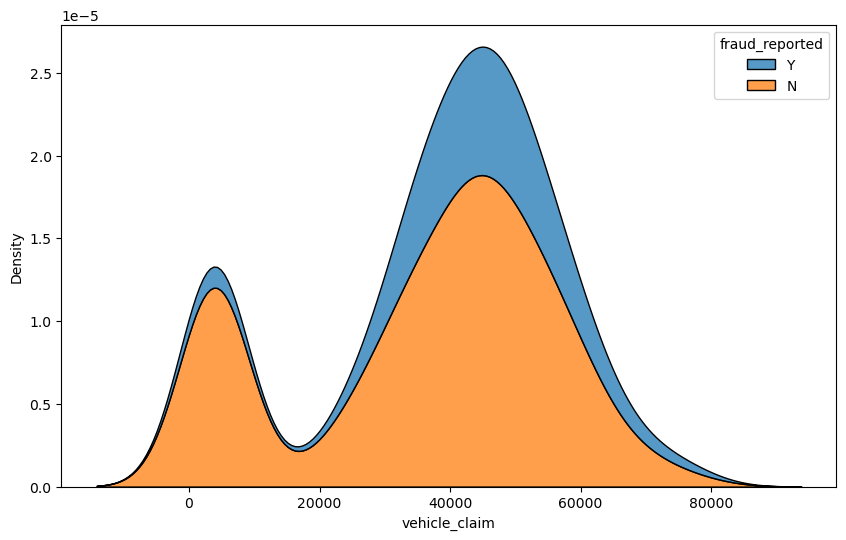

In [463]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="vehicle_claim", hue="fraud_reported", multiple="stack")

<AxesSubplot: xlabel='injury_claim', ylabel='Density'>

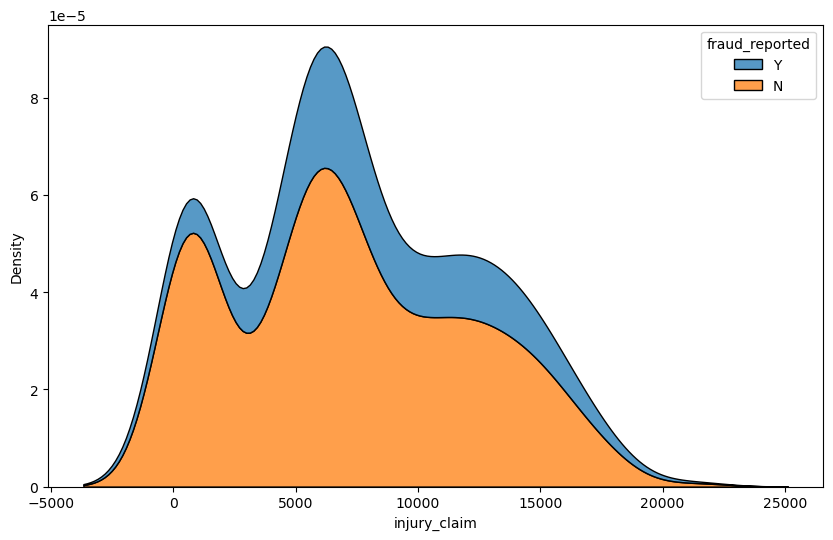

In [464]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="injury_claim", hue="fraud_reported", multiple="stack")

<AxesSubplot: xlabel='property_claim', ylabel='Density'>

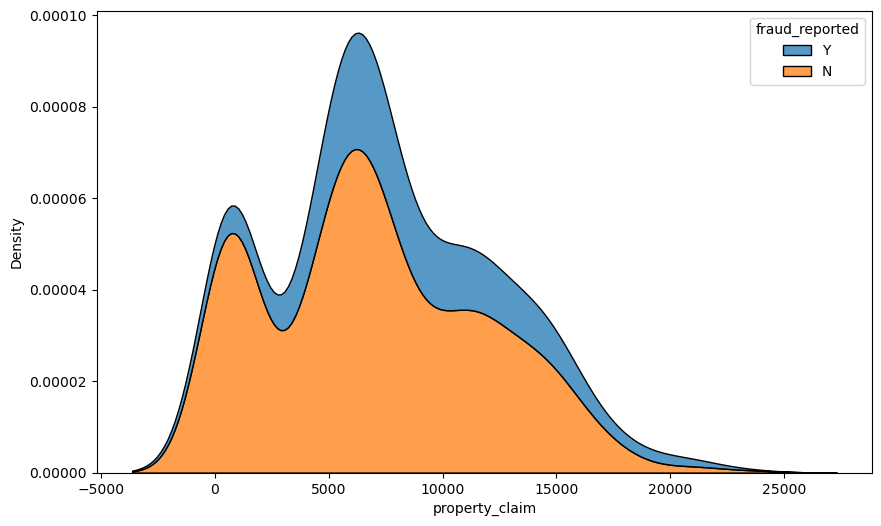

In [465]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="property_claim", hue="fraud_reported", multiple="stack")

Here we can see total claim and vehicle claim having same kind of pattern and amount claimed is higher at 40000,

Propertyclaim and injury claim are showing same relation, amount claim is higher between 5000-10000.

<Figure size 2000x2000 with 0 Axes>

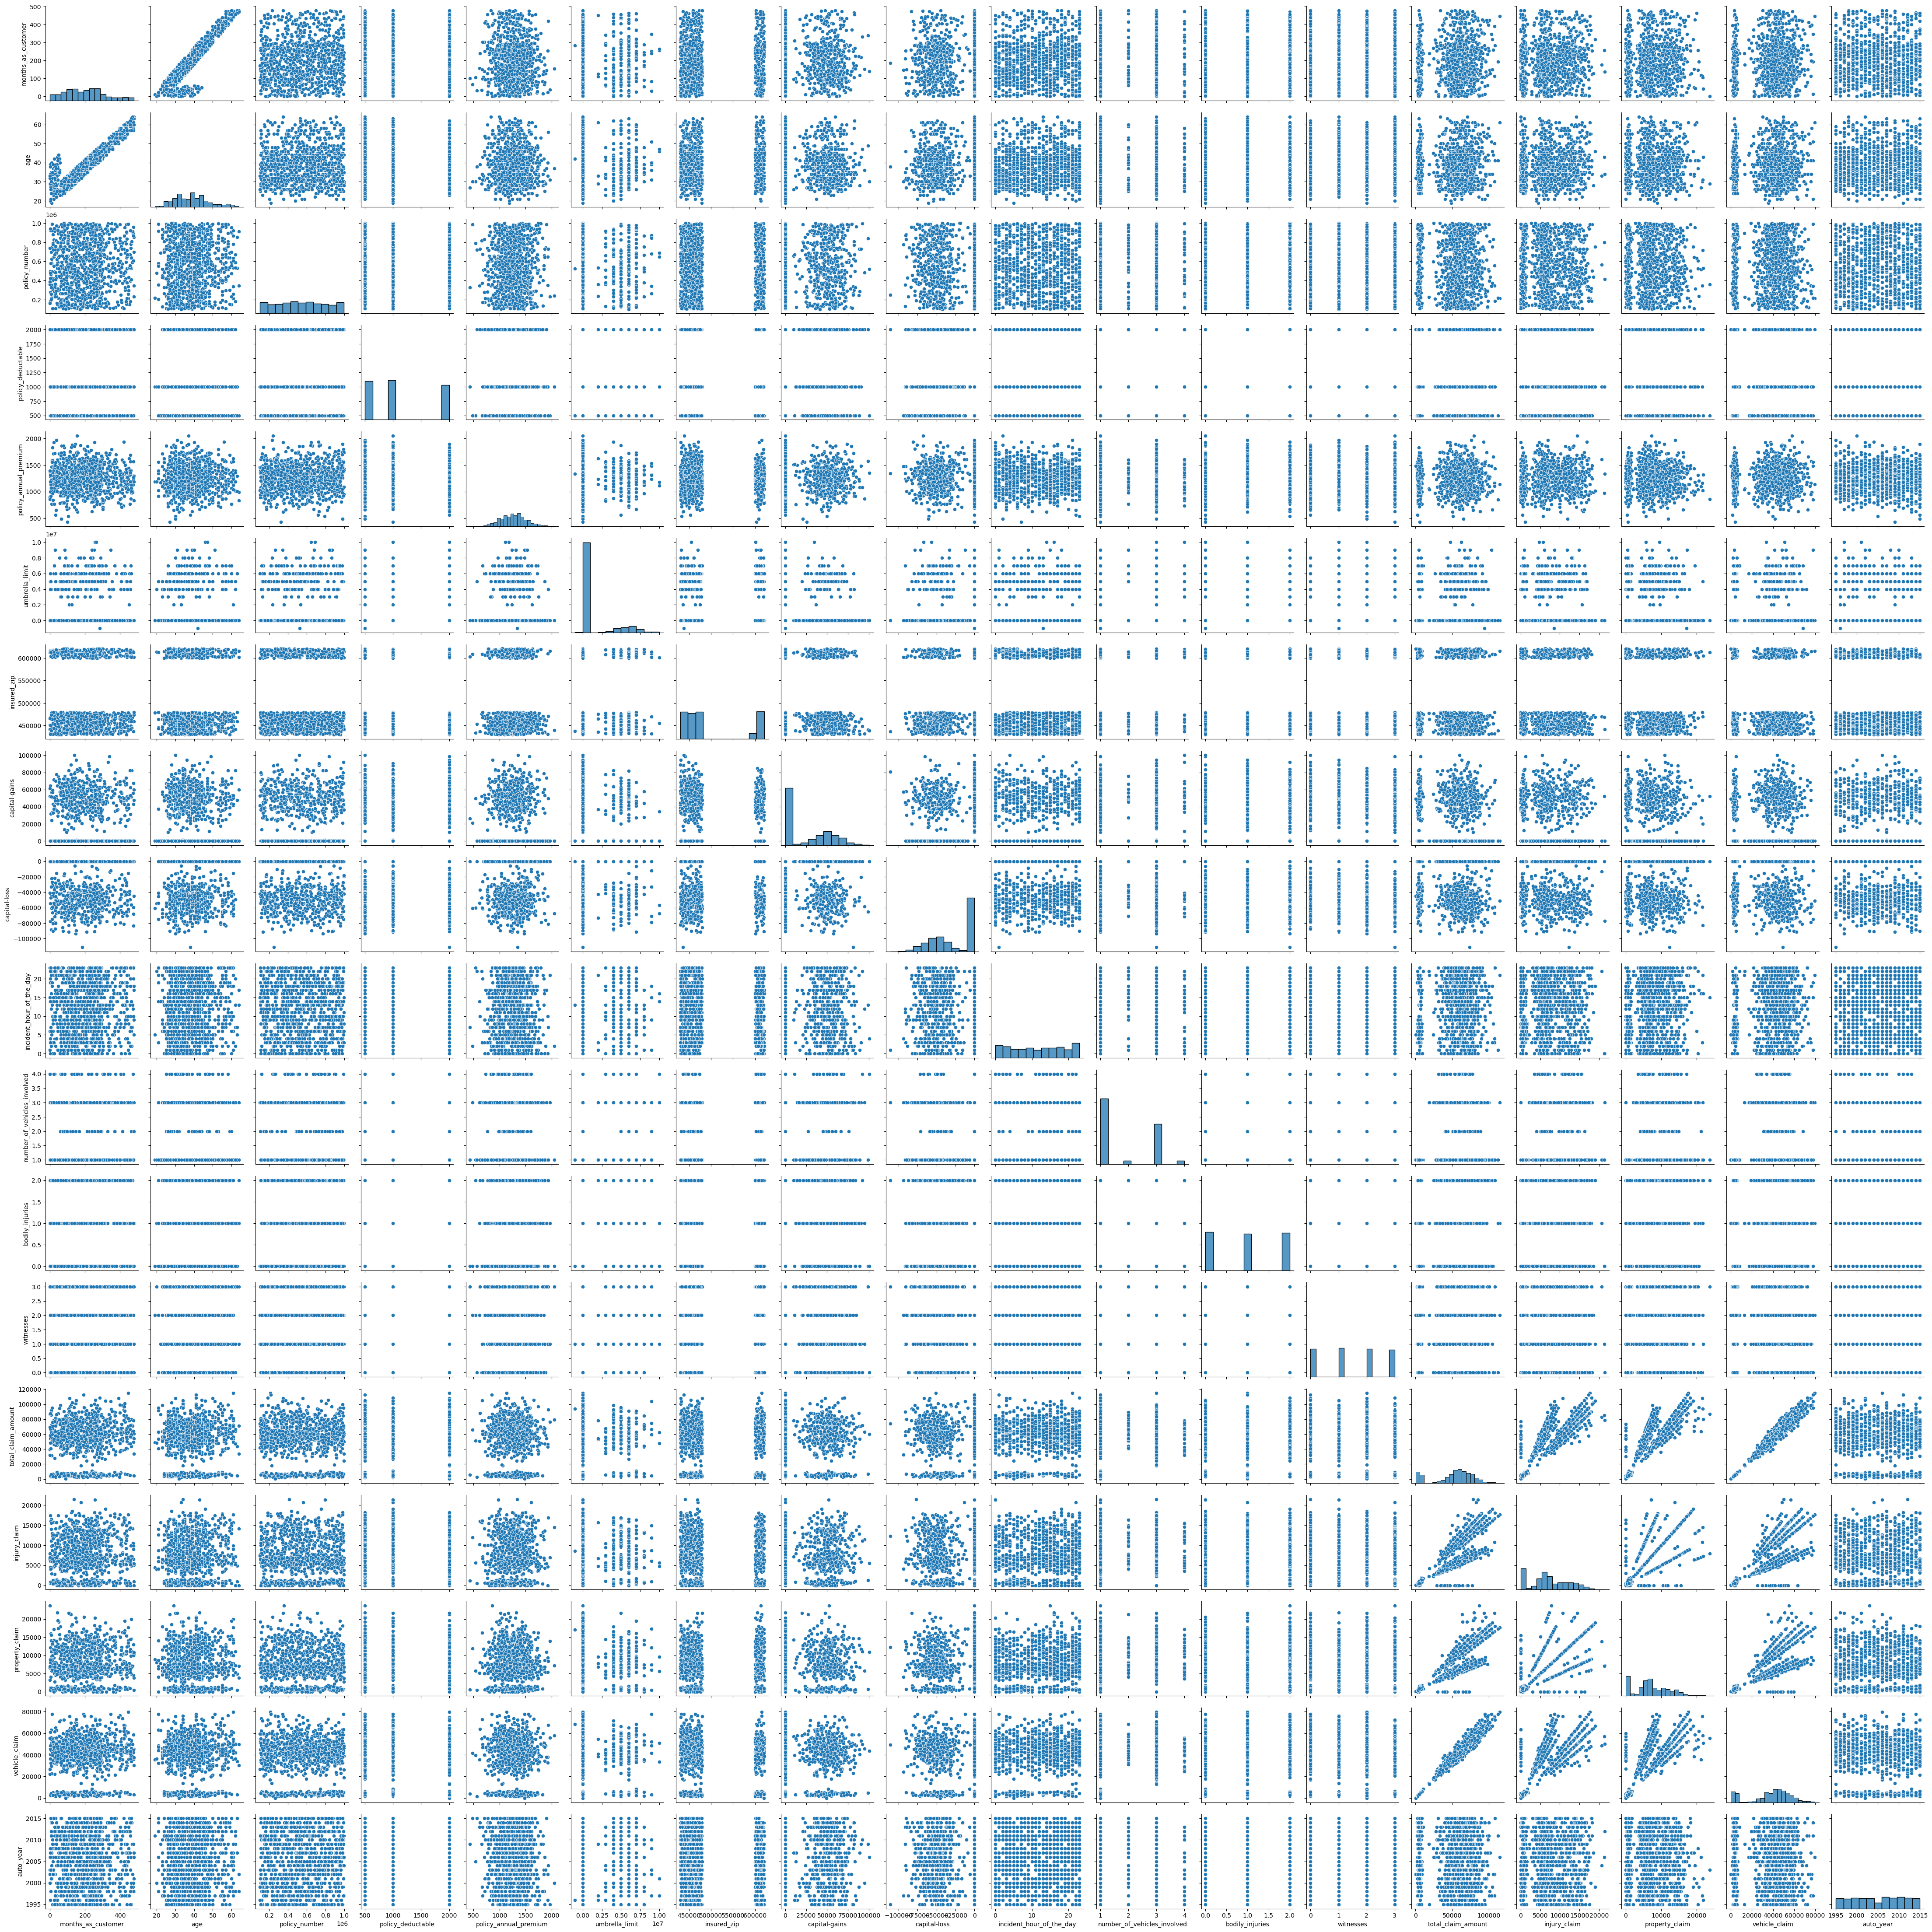

In [466]:
plt.figure(figsize= (20,20))
sns.pairplot(data= data)

# Data preprocessing
We will first drope the columns not having relevance with the Target.

From EDA we came to conclusion that months_as_customer, policy_number,policy_bind_date , incident_date, incident_location,auto_model,
auto_year are not having direct relation with Fraud_reported.

In [467]:
feature=data.drop(['months_as_customer', 'policy_number','policy_bind_date','fraud_reported', 'incident_date', 'incident_location','auto_model', 'auto_year'],axis=1)

In [468]:
target= data['fraud_reported']

In [469]:
feature

age policy_state policy_csl  policy_deductable  policy_annual_premium  \
0     48           OH    250/500               1000                1406.91   
1     42           IN    250/500               2000                1197.22   
2     29           OH    100/300               2000                1413.14   
3     41           IL    250/500               2000                1415.74   
4     44           IL   500/1000               1000                1583.91   
..   ...          ...        ...                ...                    ...   
995   38           OH   500/1000               1000                1310.80   
996   41           IL    100/300               1000                1436.79   
997   34           OH    250/500                500                1383.49   
998   62           IL   500/1000               2000                1356.92   
999   60           OH    250/500               1000                 766.19   

     umbrella_limit  insured_zip insured_sex insured_education_level  \
0                 0       466132        MALE                      MD   
1           5000000       468176        MALE                      MD   
2           5000000       430632      FEMALE                     PhD   
3           6000000       608117      FEMALE                     PhD   
4           6000000       610706        MALE               Associate   
..              ...          ...         ...                     ...   
995               0       431289      FEMALE                 Masters   
996               0       608177      FEMALE                     PhD   
997         3000000       442797      FEMALE                 Masters   
998         5000000       441714        MALE               Associate   
999               0       612260      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  capital-gains  \
0         craft-repair        sleeping              husband          53300   
1    machine-op-inspct         reading       other-relative              0   
2                sales     board-games            own-child          35100   
3         armed-forces     board-games            unmarried          48900   
4                sales     board-games            unmarried          66000   
..                 ...             ...                  ...            ...   
995       craft-repair       paintball            unmarried              0   
996     prof-specialty        sleeping                 wife          70900   
997       armed-forces  bungie-jumping       other-relative          35100   
998  handlers-cleaners    base-jumping                 wife              0   
999              sales        kayaking              husband              0   

     capital-loss             incident_type   collision_type  \
0               0  Single Vehicle Collision   Side Collision   
1               0             Vehicle Theft   Rear Collision   
2               0   Multi-vehicle Collision   Rear Collision   
3          -62400  Single Vehicle Collision  Front Collision   
4          -46000             Vehicle Theft   Rear Collision   
..            ...                       ...              ...   
995             0  Single Vehicle Collision  Front Collision   
996             0  Single Vehicle Collision   Rear Collision   
997             0   Multi-vehicle Collision   Side Collision   
998             0  Single Vehicle Collision   Rear Collision   
999             0                Parked Car   Rear Collision   

    incident_severity authorities_contacted incident_state incident_city  \
0        Major Damage                Police             SC      Columbus   
1        Minor Damage                Police             VA     Riverwood   
2        Minor Damage                Police             NY      Columbus   
3        Major Damage                Police             OH     Arlington   
4        Minor Damage                  None             NY     Arlington   
..                ...                   .

In [470]:
target

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [471]:
target.shape

(1000,)

In [472]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )


In [473]:
data_new.shape

(1000, 102)

After applyign one hot encoder, now our data changes into (1000, 102)

In [474]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)
data_new['fraud_reported']= Target
data_new.head(2)

age  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0   48               1000                1406.91               0       466132   
1   42               2000                1197.22         5000000       468176   

   capital-gains  capital-loss  incident_hour_of_the_day  \
0          53300             0                         5   
1              0             0                         8   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                            1                1          2   
1                            1                0          0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0               71610          6510           13020          52080   
1                5070           780             780           3510   

   policy_state_IN  policy_state_OH  policy_csl_250/500  policy_csl_500/1000  \
0                0                1                   1                    0   
1                1                0                   1                    0   

   insured_sex_MALE  insured_education_level_College  \
0                 1                                0   
1                 1                                0   

   insured_education_level_High School  insured_education_level_JD  \
0                                    0                           0   
1                                    0                           0   

   insured_education_level_MD  insured_education_level_Masters  \
0                           1                                0   
1                           1                                0   

   insured_education_level_PhD  insured_occupation_armed-forces  \
0                            0                                0   
1                            0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   

   insured_occupation_tech-support  insured_occupation_transport-moving  \
0                                0                                    0   
1                                0                                    0   

   insured_hobbies_basketball  insured_hobbies_board-games  \
0                           0                            0   
1                           0                            0   

   insured_hobbies_bungie-jumping  insured_hobbies_camping  \
0                               0                        0   
1                               0                        0   

   insured_hobbies_chess  insured_hobbies_cross-fit  insured_hobbies_dancing  \
0                      0                          0                        0   
1                      0                          0                        0   

   insured_hobbies_exercise  insured_hobbies_golf  insured_hobbies_hiking  \
0                         0                     0                       0   
1                         0            

# Lets check Correlation

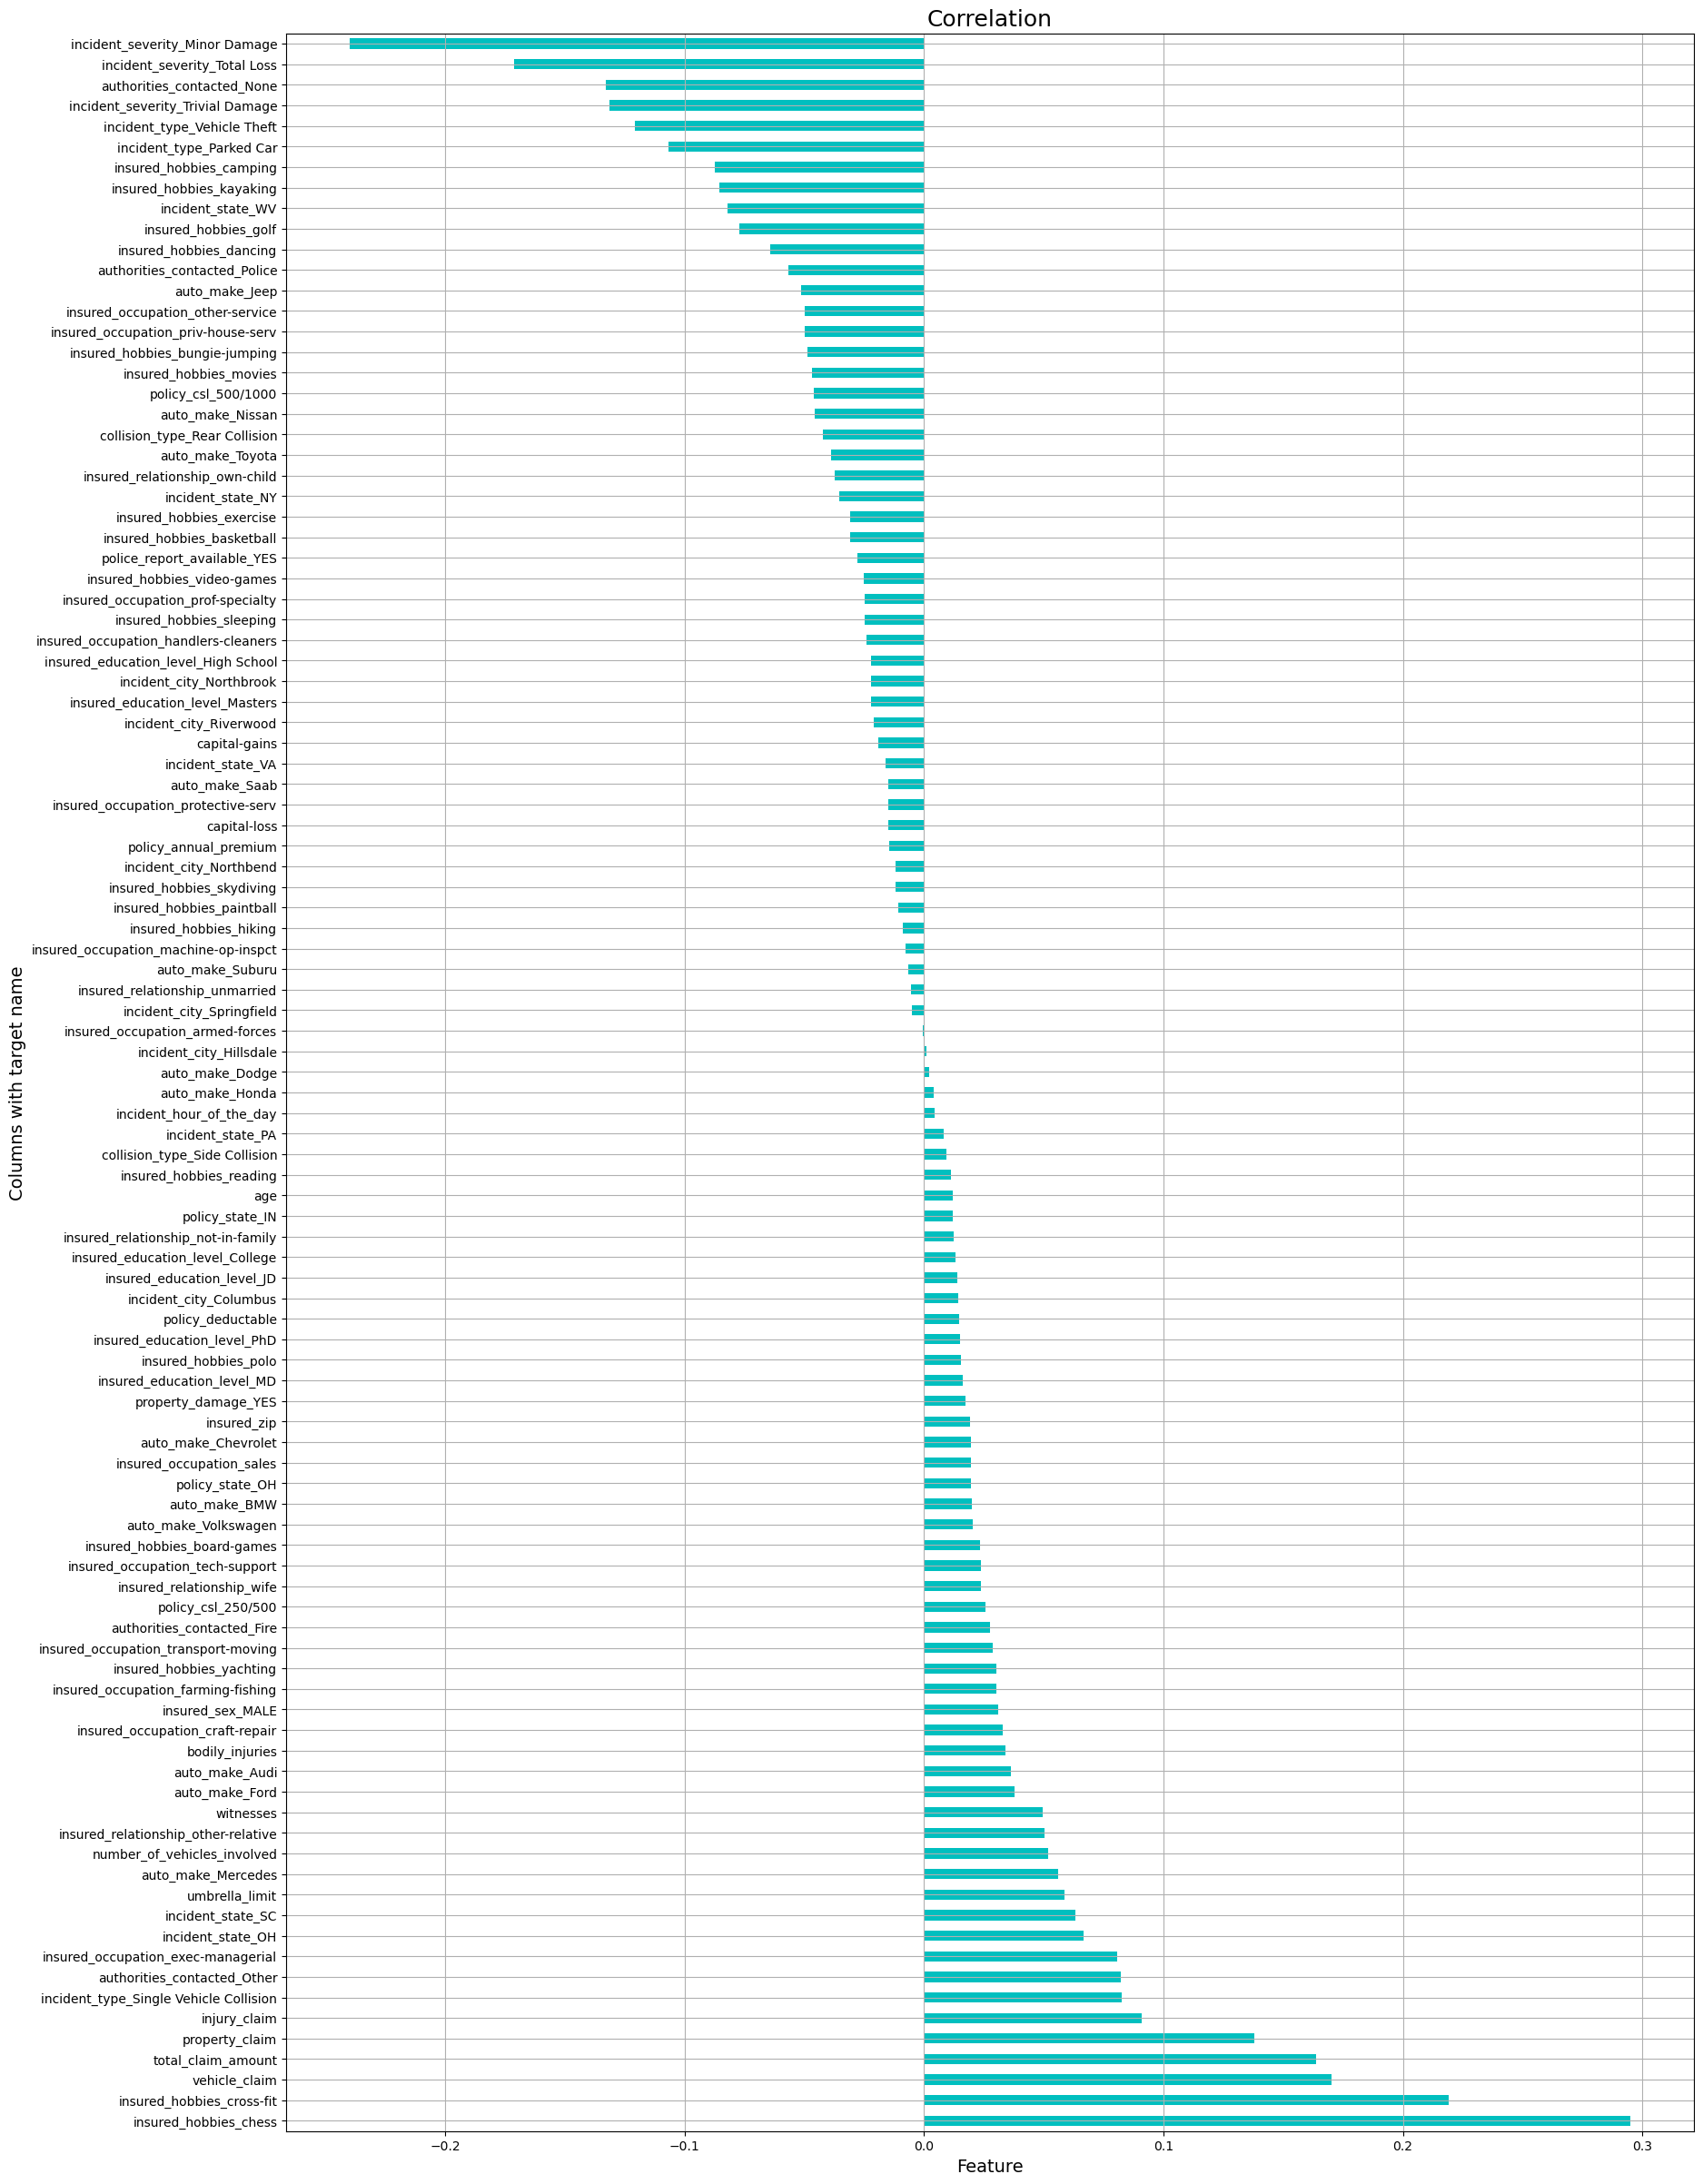

In [475]:

plt.figure(figsize=(20,30))
data_new.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the targat,
and Features on the left of the 0.0 are having negative or 0 correlation.

# Checking Outliers
Here we be chaking Outliers present in the numerical columns.

<AxesSubplot: >

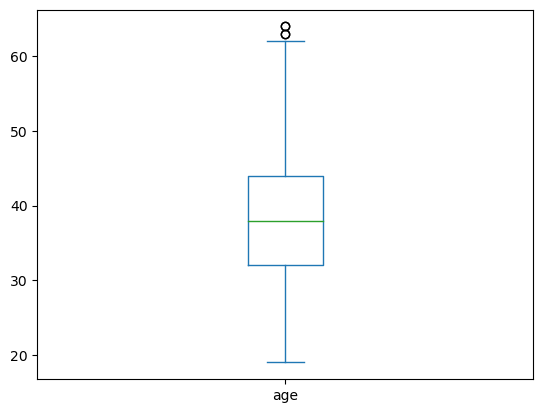

In [476]:
data_new['age'].plot.box()


<AxesSubplot: >

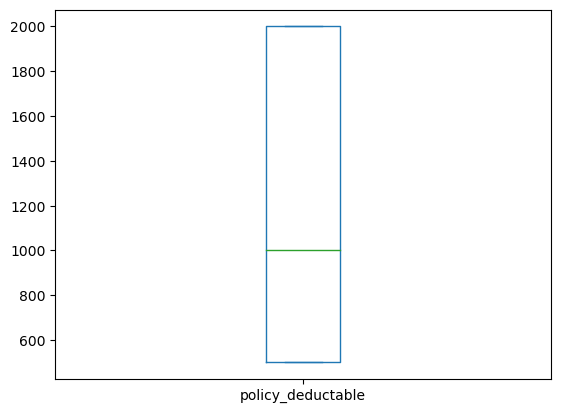

In [477]:
data_new['policy_deductable'].plot.box()

<AxesSubplot: >

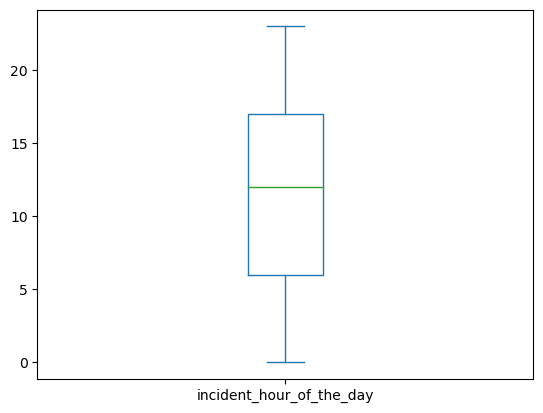

In [478]:
data_new['incident_hour_of_the_day'].plot.box()

<AxesSubplot: >

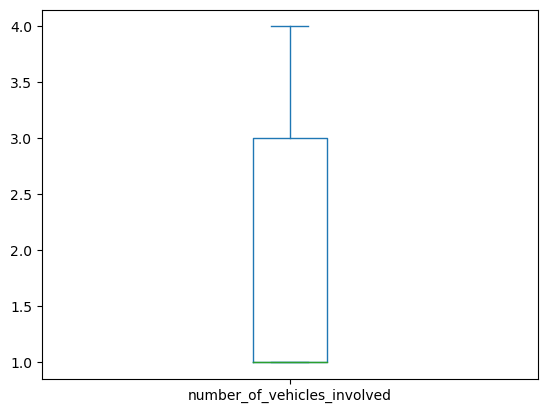

In [479]:
data_new['number_of_vehicles_involved'].plot.box()

<AxesSubplot: >

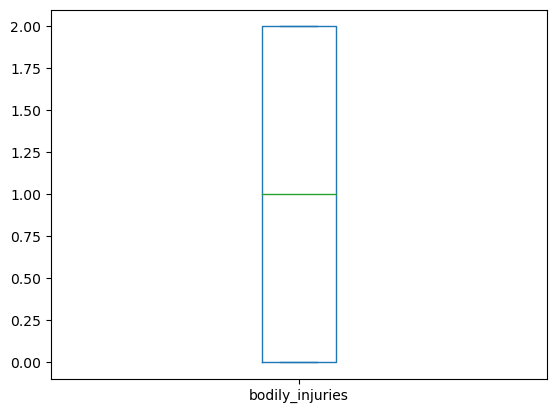

In [480]:
data_new['bodily_injuries'].plot.box()

<AxesSubplot: >

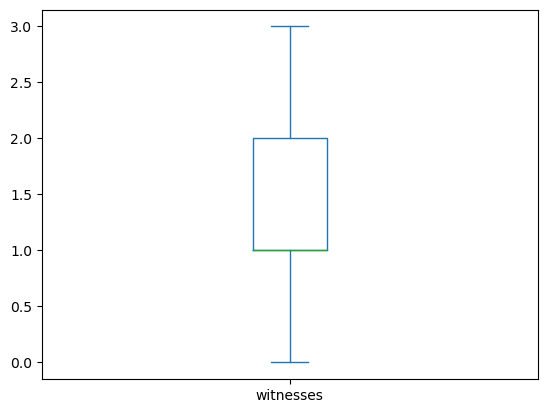

In [481]:
data_new['witnesses'].plot.box()

<AxesSubplot: >

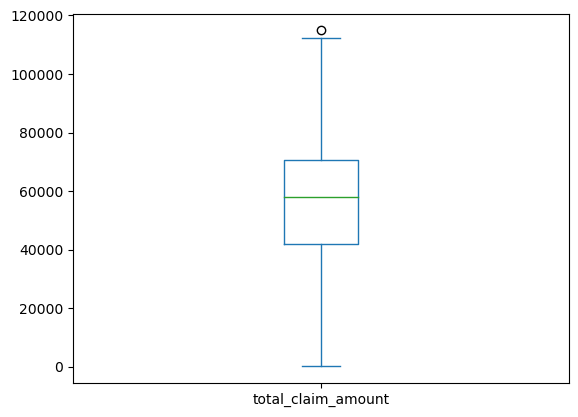

In [482]:
data_new['total_claim_amount'].plot.box()

<AxesSubplot: >

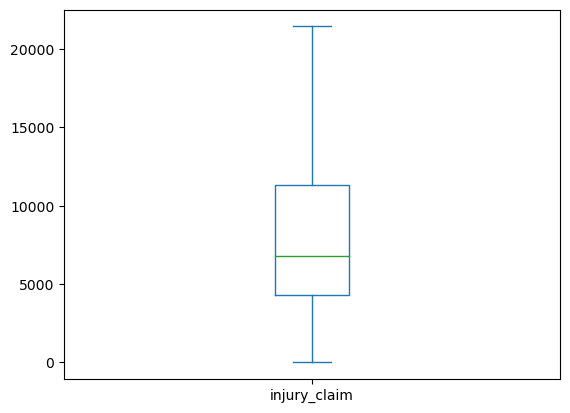

In [483]:
data_new['injury_claim'].plot.box()

<AxesSubplot: >

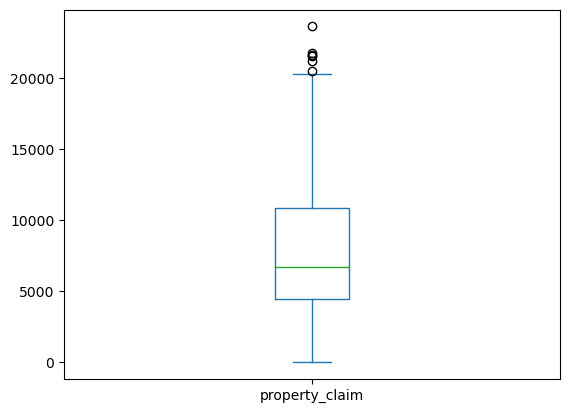

In [484]:
data_new['property_claim'].plot.box()

We can see very few outliers are present in Property Claim and policy_annual_premium,

# Checkign Skewness


In [485]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

here we can see Only Umbrella unit , total claim amount , and vehicle claim having skewness.

# Removing Skewness from the data

In [486]:
data_new['number_of_vehicles_involved'] = np.sqrt( data_new['number_of_vehicles_involved'] )
data_new['total_claim_amount'] = np.sqrt( data_new['total_claim_amount'] )
data_new['vehicle_claim'] = np.sqrt( data_new['vehicle_claim'] )

In [487]:
# Scaling the data Using StandardScaler and Using SMOTE
# Dividing into Feature and Target data
x=data_new.drop(['fraud_reported'],axis=1)
y=data_new['fraud_reported']

In [488]:
x.shape

(1000, 102)

In [489]:
y.shape

(1000,)

In [490]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)


<AxesSubplot: xlabel='fraud_reported', ylabel='count'>

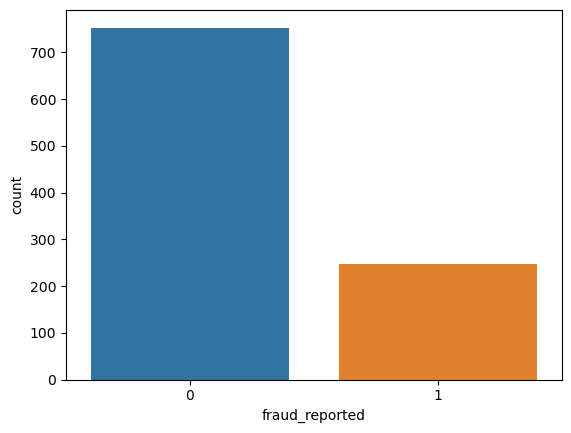

In [491]:
sns.countplot(x=y)

#Here we can see our output is not balanced we will now use SMOTE to balance the output.

In [492]:


from imblearn.over_sampling import SMOTE
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [493]:
X_train_over.shape

(1506, 102)

In [496]:
X_train_over

array([[ 0.99083647, -0.22238259,  0.61670461, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [ 0.33407345,  1.41278352, -0.24252118, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [-1.08891308,  1.41278352,  0.64223266, ..., -0.29488391,
        -0.27435163, -0.27011363],
       ...,
       [-0.69687325,  0.31469865, -0.67675827, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [ 0.02342801, -0.59805554, -0.76543443, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [ 0.72165483, -0.47703375, -0.93803188, ..., -0.29488391,
        -0.27435163, -0.27011363]])

In [494]:
Y_train_over.shape

(1506,)

In [495]:
Y_train_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [502]:
pd.set_option('display.max_columns', 200)
data_new.columns
data=data_new.drop(['fraud_reported'],axis=1)
#.

In [503]:
data

age  policy_deductable  policy_annual_premium  umbrella_limit  \
0     48               1000                1406.91               0   
1     42               2000                1197.22         5000000   
2     29               2000                1413.14         5000000   
3     41               2000                1415.74         6000000   
4     44               1000                1583.91         6000000   
..   ...                ...                    ...             ...   
995   38               1000                1310.80               0   
996   41               1000                1436.79               0   
997   34                500                1383.49         3000000   
998   62               2000                1356.92         5000000   
999   60               1000                 766.19               0   

     insured_zip  capital-gains  capital-loss  incident_hour_of_the_day  \
0         466132          53300             0                         5   
1         468176              0             0                         8   
2         430632          35100             0                         7   
3         608117          48900        -62400                         5   
4         610706          66000        -46000                        20   
..           ...            ...           ...                       ...   
995       431289              0             0                        20   
996       608177          70900             0                        23   
997       442797          35100             0                         4   
998       441714              0             0                         2   
999       612260              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
0                       1.000000                1          2   
1                       1.000000                0          0   
2                       1.732051                2          3   
3                       1.000000                1          2   
4                       1.000000                0          1   
..                           ...              ...        ...   
995                     1.000000                0          1   
996                     1.000000                2          3   
997                     1.732051                2          3   
998                     1.000000                0          1   
999                     1.000000                0          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0            267.600448          6510           13020     228.210429   
1             71.203932           780             780      59.245253   
2            186.145105          7700            3850     151.986842   
3            251.793566          6340            6340     225.211012   
4             80.622577          1300             650      67.453688   
..                  ...           ...             ...            ...   
995          295.296461         17440            8720     247.062745   
996          329.363022         18080           18080     268.923781   
997          259.807621          7500            7500     229.128785   
998          216.748702          5220            5220     191.154388   
999           71.133677           460             920      60.663004   

     policy_state_IN  policy_state_OH  policy_csl_250/500  \
0                  0                1                   1   
1                  1                0                   1   
2                  0                1                   0   
3                  0                0                   1   
4                  0                0                   0   
..               ...              ...                 ...   
995                0                1                   0   
996                0                0                   0   
997                0                1                   1   
998                

In [504]:
dfx=pd.DataFrame(data=X_train_over, columns=[data])

'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',  'insured_occupation_transport-moving', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-jumping',
       'insured_hobbies_camping', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_dancing',
       'insured_hobbies_exercise', 'insured_hobbies_golf',
       'insured_hobbies_hiking', 'insured_hobbies_kayaking',
       'insured_hobbies_movies', 'insured_hobbies_paintball',
       'insured_hobbies_polo', 'insured_hobbies_reading',
       'insured_hobbies_skydiving', 'insured_hobbies_sleeping',
       'insured_hobbies_video-games', 'insured_hobbies_yachting',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorities_contacted_Police',
       'incident_state_NY', 'incident_state_OH', 'incident_state_PA', 'incident_state_SC', 'incident_state_VA', 'incident_state_WV',
       'incident_city_Columbus', 'incident_city_Hillsdale',
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_YES', 'police_report_available_YES'

In [507]:
dfx.shape

(1506, 102)

# VIF Calculation

In [508]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF FACTOR']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [511]:
dfx

age policy_deductable policy_annual_premium umbrella_limit  \
0     0.990836         -0.222383              0.616705      -0.479476   
1     0.334073          1.412784             -0.242521       1.697980   
2    -1.088913          1.412784              0.642233       1.697980   
3     0.224613          1.412784              0.652886       2.133471   
4     0.552994         -0.222383              1.341980       2.133471   
...        ...               ...                   ...            ...   
1501  0.213667         -1.034515             -1.673601      -0.479476   
1502  0.579395         -0.698506              0.782323      -0.479476   
1503 -0.696873          0.314699             -0.676758      -0.479476   
1504  0.023428         -0.598056             -0.765434      -0.479476   
1505  0.721655         -0.477034             -0.938032       2.433321   

     insured_zip capital-gains capital-loss incident_hour_of_the_day  \
0      -0.489529      1.011331     0.953851                -0.956261   
1      -0.461008     -0.901927     0.953851                -0.524475   
2      -0.984885      0.358023     0.953851                -0.668404   
3       1.491682      0.853388    -1.267577                -0.956261   
4       1.527808      1.467210    -0.683741                 1.202666   
...          ...           ...          ...                      ...   
1501   -0.870800     -0.901927     0.953851                -1.525258   
1502   -0.352417     -0.671981     0.953851                 0.388199   
1503    1.439812     -0.186225    -0.703431                 0.547460   
1504   -0.469255      1.030616     0.953851                 0.572479   
1505   -0.629802      1.381652    -0.022981                -1.675903   

     number_of_vehicles_involved bodily_injuries witnesses total_claim_amount  \
0                      -0.832491        0.009759  0.461838           0.678693   
1                      -0.832491       -1.210174 -1.338700          -1.983392   
2                       1.162352        1.229693  1.362107          -0.425406   
3                      -0.832491        0.009759  0.461838           0.464436   
4                      -0.832491       -1.210174 -0.438431          -1.855726   
...                          ...             ...       ...                ...   
1501                   -0.832491        0.017892 -1.326696           1.585643   
1502                    1.587566       -1.210174  0.461838           0.408563   
1503                    1.489243       -0.664015  0.461838           0.126914   
1504                    1.162352        0.009759 -0.024765           0.363014   
1505                   -0.832491       -0.370211  0.520891           0.710683   

     injury_claim property_claim vehicle_claim policy_state_IN  \
0       -0.189283       1.165505      0.700647       -0.670280   
1       -1.363822      -1.372696     -2.006678        1.491914   
2        0.054644      -0.736072     -0.520682       -0.670280   
3       -0.224130      -0.219722      0.652588       -0.670280   
4       -1.257232      -1.399654     -1.875155       -0.670280   
...           ...            ...           ...             ...   
1501     1.994744       2.039553      1.505575       -0.670280   
1502     0.600750      -0.182262      0.416285        0.588883   
1503    -0.405336      -0.403040      0.270981        0.297724   
1504    -0.454087       0.066593      0.508448        0.323231   
1505     1.464575       1.036540      0.476559        0.003175   

     policy_state_OH policy_csl_250/500 policy_csl_500/1000 insured_sex_MALE  \
0           1.356801           1.359780           -0.654654         1.076953   
1          -0.737028           1.359780           -0.654654         1.076953   
2           1.356801          -0.735413           -0.654654        -0.928546   
3          -0.737028           1.359780           -0.654654        -0.928546   
4          -0.737028          -0.735413            1.527525         1.076953   
...              ...   

In [512]:
dfx.drop(['total_claim_amount'],axis=1, inplace= True)
dfx.drop(['number_of_vehicles_involved'],axis=1, inplace= True)

In [516]:
x=dfx
y=Y_train_over

In [517]:
x

age policy_deductable policy_annual_premium umbrella_limit  \
0     0.990836         -0.222383              0.616705      -0.479476   
1     0.334073          1.412784             -0.242521       1.697980   
2    -1.088913          1.412784              0.642233       1.697980   
3     0.224613          1.412784              0.652886       2.133471   
4     0.552994         -0.222383              1.341980       2.133471   
...        ...               ...                   ...            ...   
1501  0.213667         -1.034515             -1.673601      -0.479476   
1502  0.579395         -0.698506              0.782323      -0.479476   
1503 -0.696873          0.314699             -0.676758      -0.479476   
1504  0.023428         -0.598056             -0.765434      -0.479476   
1505  0.721655         -0.477034             -0.938032       2.433321   

     insured_zip capital-gains capital-loss incident_hour_of_the_day  \
0      -0.489529      1.011331     0.953851                -0.956261   
1      -0.461008     -0.901927     0.953851                -0.524475   
2      -0.984885      0.358023     0.953851                -0.668404   
3       1.491682      0.853388    -1.267577                -0.956261   
4       1.527808      1.467210    -0.683741                 1.202666   
...          ...           ...          ...                      ...   
1501   -0.870800     -0.901927     0.953851                -1.525258   
1502   -0.352417     -0.671981     0.953851                 0.388199   
1503    1.439812     -0.186225    -0.703431                 0.547460   
1504   -0.469255      1.030616     0.953851                 0.572479   
1505   -0.629802      1.381652    -0.022981                -1.675903   

     bodily_injuries witnesses injury_claim property_claim vehicle_claim  \
0           0.009759  0.461838    -0.189283       1.165505      0.700647   
1          -1.210174 -1.338700    -1.363822      -1.372696     -2.006678   
2           1.229693  1.362107     0.054644      -0.736072     -0.520682   
3           0.009759  0.461838    -0.224130      -0.219722      0.652588   
4          -1.210174 -0.438431    -1.257232      -1.399654     -1.875155   
...              ...       ...          ...            ...           ...   
1501        0.017892 -1.326696     1.994744       2.039553      1.505575   
1502       -1.210174  0.461838     0.600750      -0.182262      0.416285   
1503       -0.664015  0.461838    -0.405336      -0.403040      0.270981   
1504        0.009759 -0.024765    -0.454087       0.066593      0.508448   
1505       -0.370211  0.520891     1.464575       1.036540      0.476559   

     policy_state_IN policy_state_OH policy_csl_250/500 policy_csl_500/1000  \
0          -0.670280        1.356801           1.359780           -0.654654   
1           1.491914       -0.737028           1.359780           -0.654654   
2          -0.670280        1.356801          -0.735413           -0.654654   
3          -0.670280       -0.737028           1.359780           -0.654654   
4          -0.670280       -0.737028          -0.735413            1.527525   
...              ...             ...                ...                 ...   
1501       -0.670280        1.342842           1.359780           -0.654654   
1502        0.588883        0.137450           0.139635           -0.654654   
1503        0.297724        0.419403           1.359780           -0.654654   
1504        0.323231       -0.737028           1.359780           -0.654654   
1505        0.003175       -0.737028          -0.735413           -0.654654   

     insured_sex_MALE insured_education_level_College  \
0            1.076953                       -0.372763   
1            1.076953                       -0.372763   
2           -0.928546                       -0.372763   
3           -0.928546                       -0.372763   
4            1.076953                       -0.372763   
...               ...                             ...   
1501    

In [518]:
y

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1506, dtype: int32

# Model Design

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [520]:
# Chosing Best Random State

In [521]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  212 The Model performing Well
At Random State 212
Training Accuracy score is- 89.70099667774086
Testing Accuracy Score is- 89.73509933774835
At Random state  388 The Model performing Well
At Random State 388
Training Accuracy score is- 89.70099667774086
Testing Accuracy Score is- 89.73509933774835
At Random state  437 The Model performing Well
At Random State 437
Training Accuracy score is- 88.70431893687709
Testing Accuracy Score is- 88.74172185430463
At Random state  730 The Model performing Well
At Random State 730
Training Accuracy score is- 89.11960132890366
Testing Accuracy Score is- 89.0728476821192


In [522]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=16,test_size=0.20)


In [523]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.8741721854304636


In [524]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[129  22]
 [ 16 135]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       151
           1       0.86      0.89      0.88       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [525]:
# Cross validation of model.

In [526]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 86.32138114209828
Accuracy Score:- 87.41721854304636


at cv:- 3
Cross Validation scre is:- 86.98539176626826
Accuracy Score:- 87.41721854304636


at cv:- 4
Cross Validation scre is:- 87.11993481573452
Accuracy Score:- 87.41721854304636


at cv:- 5
Cross Validation scre is:- 86.85551473014895
Accuracy Score:- 87.41721854304636


at cv:- 6
Cross Validation scre is:- 87.71580345285524
Accuracy Score:- 87.41721854304636


at cv:- 7
Cross Validation scre is:- 87.32127476313522
Accuracy Score:- 87.41721854304636


at cv:- 8
Cross Validation scre is:- 87.19112349431498
Accuracy Score:- 87.41721854304636


at cv:- 9
Cross Validation scre is:- 87.45841650033266
Accuracy Score:- 87.41721854304636




At cv:4 Cross val score and Accuracy Score are having very less diffrence, But Still model performance not good, lets try anaother modle.

In [527]:
# SVC

In [528]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=4, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 93.70860927152319
Cross val Score : 92.50045854732208


In [529]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[140  11]
 [  8 143]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.93      0.95      0.94       151

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



# Ensemble Techniques
## KNeighborsClassifier

In [530]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=4, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 62.913907284768214
Cross val Score : 62.48606721598284


In [531]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 45 106]
 [  6 145]]
              precision    recall  f1-score   support

           0       0.88      0.30      0.45       151
           1       0.58      0.96      0.72       151

    accuracy                           0.63       302
   macro avg       0.73      0.63      0.58       302
weighted avg       0.73      0.63      0.58       302



Model performance of very poor. lets try another.

In [532]:
# DecisionTreeClassifier

In [533]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=4, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 83.44370860927152
Cross val score is: 84.33461256278572


In [534]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[124  27]
 [ 23 128]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       151
           1       0.83      0.85      0.84       151

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302



Both score are good and having less diffrence, we can consider DecisionTreeClassifier as best till now.
Lets try anaother models

In [535]:
# RandomForestClassifier

In [536]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  91.3907284768212
Cross val Score : 85.93423725943903


In [537]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[144   7]
 [ 19 132]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       151
           1       0.95      0.87      0.91       151

    accuracy                           0.91       302
   macro avg       0.92      0.91      0.91       302
weighted avg       0.92      0.91      0.91       302



Both the score having huge diffrence, performance is poor, lets try another Model

In [538]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=4, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  90.06622516556291
Cross val Score : 83.9425546024042


In [539]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[138  13]
 [ 17 134]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       151
           1       0.91      0.89      0.90       151

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



Both the score having huge diffrence, performance is poor, lets try another Model

In [540]:
# GaussianNB


In [541]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 74.83443708609272
Cross Val Score is : 76.03759074689307


In [542]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[107  44]
 [ 32 119]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       151
           1       0.73      0.79      0.76       151

    accuracy                           0.75       302
   macro avg       0.75      0.75      0.75       302
weighted avg       0.75      0.75      0.75       302



Model score is less as compare to DecisionTreeClassifier, DecisionTreeClassifier is still best model.

DecisionTreeClassifier and SVC are having good accurcay and performance, lets try hyper parameter tuning for both.

# Hyperparameter Tuning of the model.

In [543]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}


In [544]:
scv=SVC(C=2,decision_function_shape='ovo', gamma='auto', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=4, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 93.70860927152319
Cross val Score : 92.50045854732208


In [545]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)  

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'best'}


In [546]:
dt=DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter= 'random', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )


accuracy_score 80.4635761589404
Cross val score is: 85.13568101891455


In [547]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,125,150,175,200],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,20,30,40,50]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200, 'random_state': 40}


In [548]:
rf=RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=175, random_state=20)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  90.39735099337747
Cross val Score : 86.13564535244652


DecisionTreeClassifier with Accuracy_core: 94.70198675496688 Cross val Score : 93.16341215644223 is our best model.
# AUC ROC Curve:

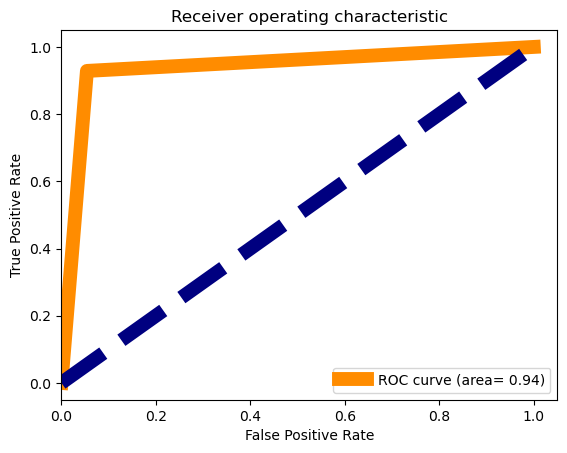

In [551]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [552]:
# Saving Best Model
import pickle
filename="Evaluation_Project_Insurance_Claims_Fraud_Detection.pkl "
pickle.dump(svc, open(filename,'wb'))


In [553]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0           0          0
1           1          1
2           0          0
3           1          1
4           0          0
5           1          0
6           1          1
7           0          0
8           1          1
9           1          1
10          0          0
11          0          0
12          1          1
13          0          0
14          1          1
15          0          0
16          1          1
17          0          0
18          1          1
19          1          1
20          0          0
21          0          0
22          0          0
23          0          0
24          0          0
25          1          1
26          1          1
27          0          0
28          0          0
29          0          0
30          0          0
31          1          0
32          0          0
33          1          1
34          1          1
35          1          1
36          0          0
37          1          1
38          1          0
39          0          0
40          0          0
41          1          1
42          0          0
43          0          0
44          0          0
45          0          0
46          1          1
47          0          0
48          1          1
49          0          1
50          0          0
51          1          1
52          1          1
53          0          0
54          0          0
55          0          0
56          1          1
57          1          1
58          1          1
59          1          1
60          0          0
61          0          0
62          1          1
63          0          0
64          1          1
65          1          1
66          0          0
67          1          1
68          0          0
69          1          1
70          1          1
71          1          1
72          1          1
73          1          1
74          0          0
75          0          0
76          0          0
77          1          1
78          1          1
79          0          0
80          0          1
81          1          1
82          1          1
83          1          1
84          1          1
85          1          1
86          0          0
87          0          0
88          1          1
89          1          1
90          0          0
91          0          0
92          0          0
93          0          0
94          1          1
95          1          1
96          0          0
97          1          1
98          0          0
99          1          1
100         1          1
101         1          1
102         0          0
103         1          1
104         0          0
105         0          0
106         1          1
107         1          1
108         0          0
109         0          0
110         1          1
111         0          0
112         0          0
113         1          1
114         0          0
115         1          1
116         0          0
117         1          1
118         0          0
119         1          1
120         1          1
121         0          0
122         0          0
123         0          0
124         1          1
125         1          1
126         0          0
127         1          1
128         0          0
129         0          0
130         0          0
131         1          1
132         1          1
133         0          1
134         0          0
135         0          0
136         1          1
137         0          0
138         1          1
139         0          0
140         0          0
141         1          1
142         0          0
143         1          1
144         1          1
145         0          0
146         1          1
147         0          0
148         0          0
149         0          0
150         0          0
151         0          0
152         1          1
153         0          0
154         0          0
155         0          0
156         1          1
157         1          1
158         0          0
159  